In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
surgery = pd.read_csv('data_6_20.csv')
surgery.head()

,Activity Type,Provider,Local Patient Identifier,LSOA,HRG,HRG Description,Fin Year,Fin Month,Activity Date,Independent Sector
0,Inpatient/Day Case,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,270506,E01018242,BZ31B,"Very Major, Cataract or Lens Procedures, with ...",2022/23,6,9/12/2022,No
1,Inpatient/Day Case,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,1319077,E01018159,BZ31B,"Very Major, Cataract or Lens Procedures, with ...",2022/23,9,12/19/2022,No
2,Inpatient/Day Case,NORTH WEST ANGLIA NHS FOUNDATION TRUST,DIS3078757,E01018192,BZ31B,"Very Major, Cataract or Lens Procedures, with ...",2022/23,12,3/28/2023,No
3,Inpatient/Day Case,NORTH WEST ANGLIA NHS FOUNDATION TRUST,DIS3027712,E01015599,BZ31B,"Very Major, Cataract or Lens Procedures, with ...",2022/23,11,2/21/2023,No
4,Inpatient/Day Case,CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...,930216,E01018051,BZ31B,"Very Major, Cataract or Lens Procedures, with ...",2022/23,9,12/6/2022,No


In [4]:
print(surgery.shape)

(38547, 10)


In [5]:
missing_data = surgery.isnull().sum()
missing_percent = (missing_data / len(surgery)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])

                          Missing Count  Percentage
Local Patient Identifier           2043    5.300023
LSOA                               6130   15.902664


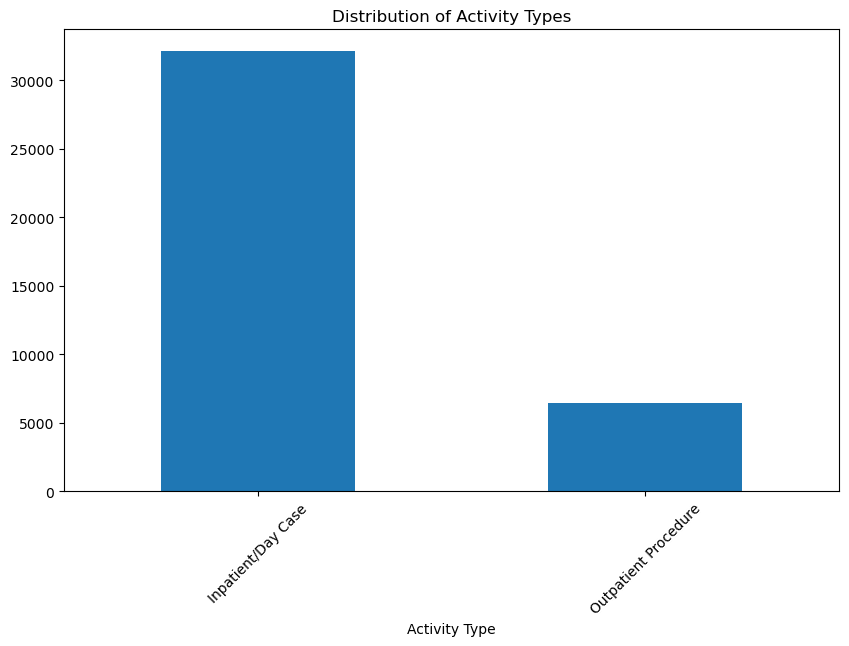

In [6]:
activity_counts = surgery['Activity Type'].value_counts()
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Distribution of Activity Types')
plt.xticks(rotation=45)
plt.show()

In [7]:
provider_counts = surgery['Provider'].value_counts()
print(f"Number of unique providers: {surgery['Provider'].nunique()}")
print("Top 10 providers by activity volume:")
print(provider_counts.head(10))

Number of unique providers: 81
Top 10 providers by activity volume:
Provider
ANGLIA COMMUNITY EYE SERVICE LTD                                   12192
SPAMEDICA PETERBOROUGH                                              8652
CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION TRUST                 6406
NORTH WEST ANGLIA NHS FOUNDATION TRUST                              6050
SPAMEDICA BEDFORD                                                   1682
ANGLIA COMMUNITY EYE SERVICE - CAMBRIDGE                             786
FITZWILLIAM HOSPITAL                                                 746
ANGLIA COMMUNITY EYE SERVICE - PETERBOROUGH                          592
THE QUEEN ELIZABETH HOSPITAL, KING'S LYNN, NHS FOUNDATION TRUST      343
ANGLIA COMMUNITY EYE SERVICE - THETFORD HEALTHY LIVING CENTRE        157
Name: count, dtype: int64


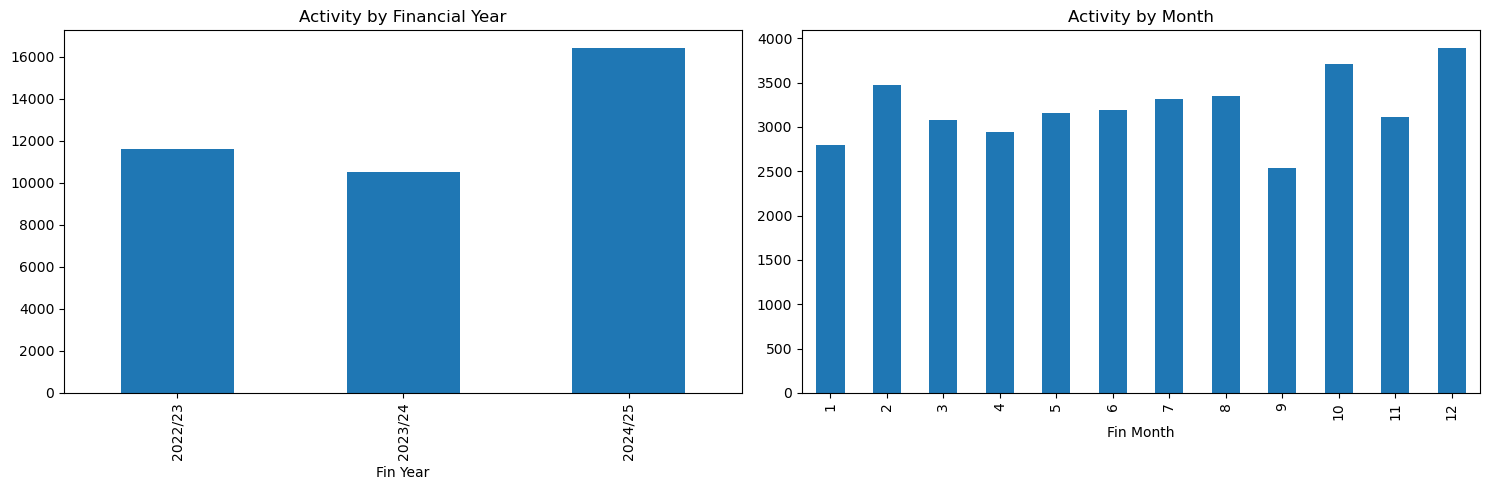

In [8]:
yearly_activity = surgery.groupby('Fin Year').size()
monthly_activity = surgery.groupby('Fin Month').size()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
yearly_activity.plot(kind='bar', ax=ax1, title='Activity by Financial Year')
monthly_activity.plot(kind='bar', ax=ax2, title='Activity by Month')
plt.tight_layout()
plt.show()

In [31]:
hrg_counts = surgery['HRG'].value_counts()
print(f"Number of unique HRGs: {surgery['HRG'].nunique()}")
print("Top 10 most common procedures:")
top_hrgs = surgery.groupby(['HRG', 'HRG Description']).size().sort_values(ascending=False)
print(top_hrgs)

Number of unique HRGs: 10
Top 10 most common procedures:
HRG    HRG Description                                                            
BZ34B  Phacoemulsification Cataract Extraction and Lens Implant, with CC Score 2-3    12368
BZ33Z  Minor, Cataract or Lens Procedures                                             10339
BZ34C  Phacoemulsification Cataract Extraction and Lens Implant, with CC Score 0-1     9038
BZ34A  Phacoemulsification Cataract Extraction and Lens Implant, with CC Score 4+      2527
BZ31A  Very Major, Cataract or Lens Procedures, with CC Score 2+                       2011
BZ31B  Very Major, Cataract or Lens Procedures, with CC Score 0-1                      1715
BZ30B  Complex, Cataract or Lens Procedures, with CC Score 0-1                          175
BZ30A  Complex, Cataract or Lens Procedures, with CC Score 2+                           167
BZ32B  Intermediate, Cataract or Lens Procedures, with CC Score 0-1                     159
BZ32A  Intermediate, Cataract or

In [10]:
lsoa_counts = surgery['LSOA'].value_counts()
print(f"Number of unique LSOAs: {surgery['LSOA'].nunique()}")


Number of unique LSOAs: 611


In [11]:
# Activity volume by provider
provider_activity = surgery.groupby('Provider').agg({
    'Local Patient Identifier': 'count',
    'HRG': 'nunique',
    'Activity Type': lambda x: x.value_counts().index[0]  # Most common activity type
}).rename(columns={
    'Local Patient Identifier': 'Total_Activities',
    'HRG': 'Unique_Procedures',
    'Activity Type': 'Primary_Activity_Type'
})

print("Provider performance summary:")
print(provider_activity.describe())

Provider performance summary:
       Total_Activities  Unique_Procedures
count         81.000000          81.000000
mean         450.666667           3.123457
std         1745.614512           2.595105
min            1.000000           1.000000
25%            1.000000           1.000000
50%            3.000000           2.000000
75%           24.000000           4.000000
max        10169.000000          10.000000


<Figure size 1500x800 with 0 Axes>

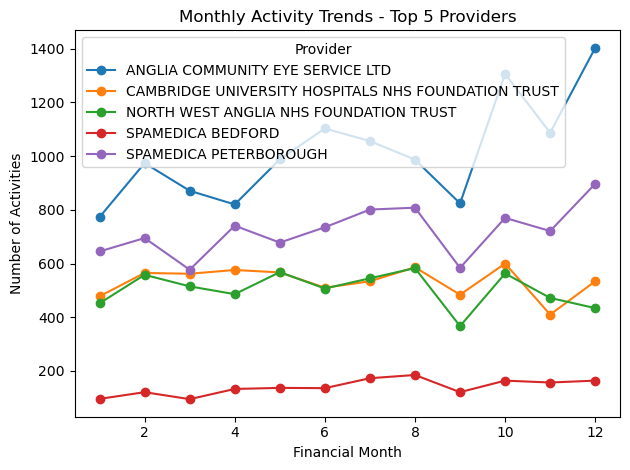

In [12]:
# Monthly activity trends by top providers
top_providers = surgery['Provider'].value_counts().head(5).index
monthly_provider = surgery[surgery['Provider'].isin(top_providers)].groupby(['Fin Month', 'Provider']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
monthly_provider.plot(kind='line', marker='o')
plt.title('Monthly Activity Trends - Top 5 Providers')
plt.xlabel('Financial Month')
plt.ylabel('Number of Activities')
plt.tight_layout()
plt.show()

In [13]:
len(surgery['LSOA'].unique())

612

In [32]:
# Seasonal patterns and trends
surgery['Activity Date'] = pd.to_datetime(surgery['Activity Date'])
surgery['Month'] = surgery['Activity Date'].dt.month
surgery['Quarter'] = surgery['Activity Date'].dt.quarter
surgery['Day_of_Week'] = surgery['Activity Date'].dt.day_name()

# Weekly patterns
weekly_activity = surgery.groupby('Day_of_Week').size()

# Quarterly trends
quarterly_trends = surgery.groupby(['Fin Year', 'Quarter']).size().unstack()

# Year-over-year comparison
surgery['Calendar_Year'] = surgery['Activity Date'].dt.year
yearly_comparison = surgery.groupby(['Calendar_Year', 'Fin Month']).size().unstack()

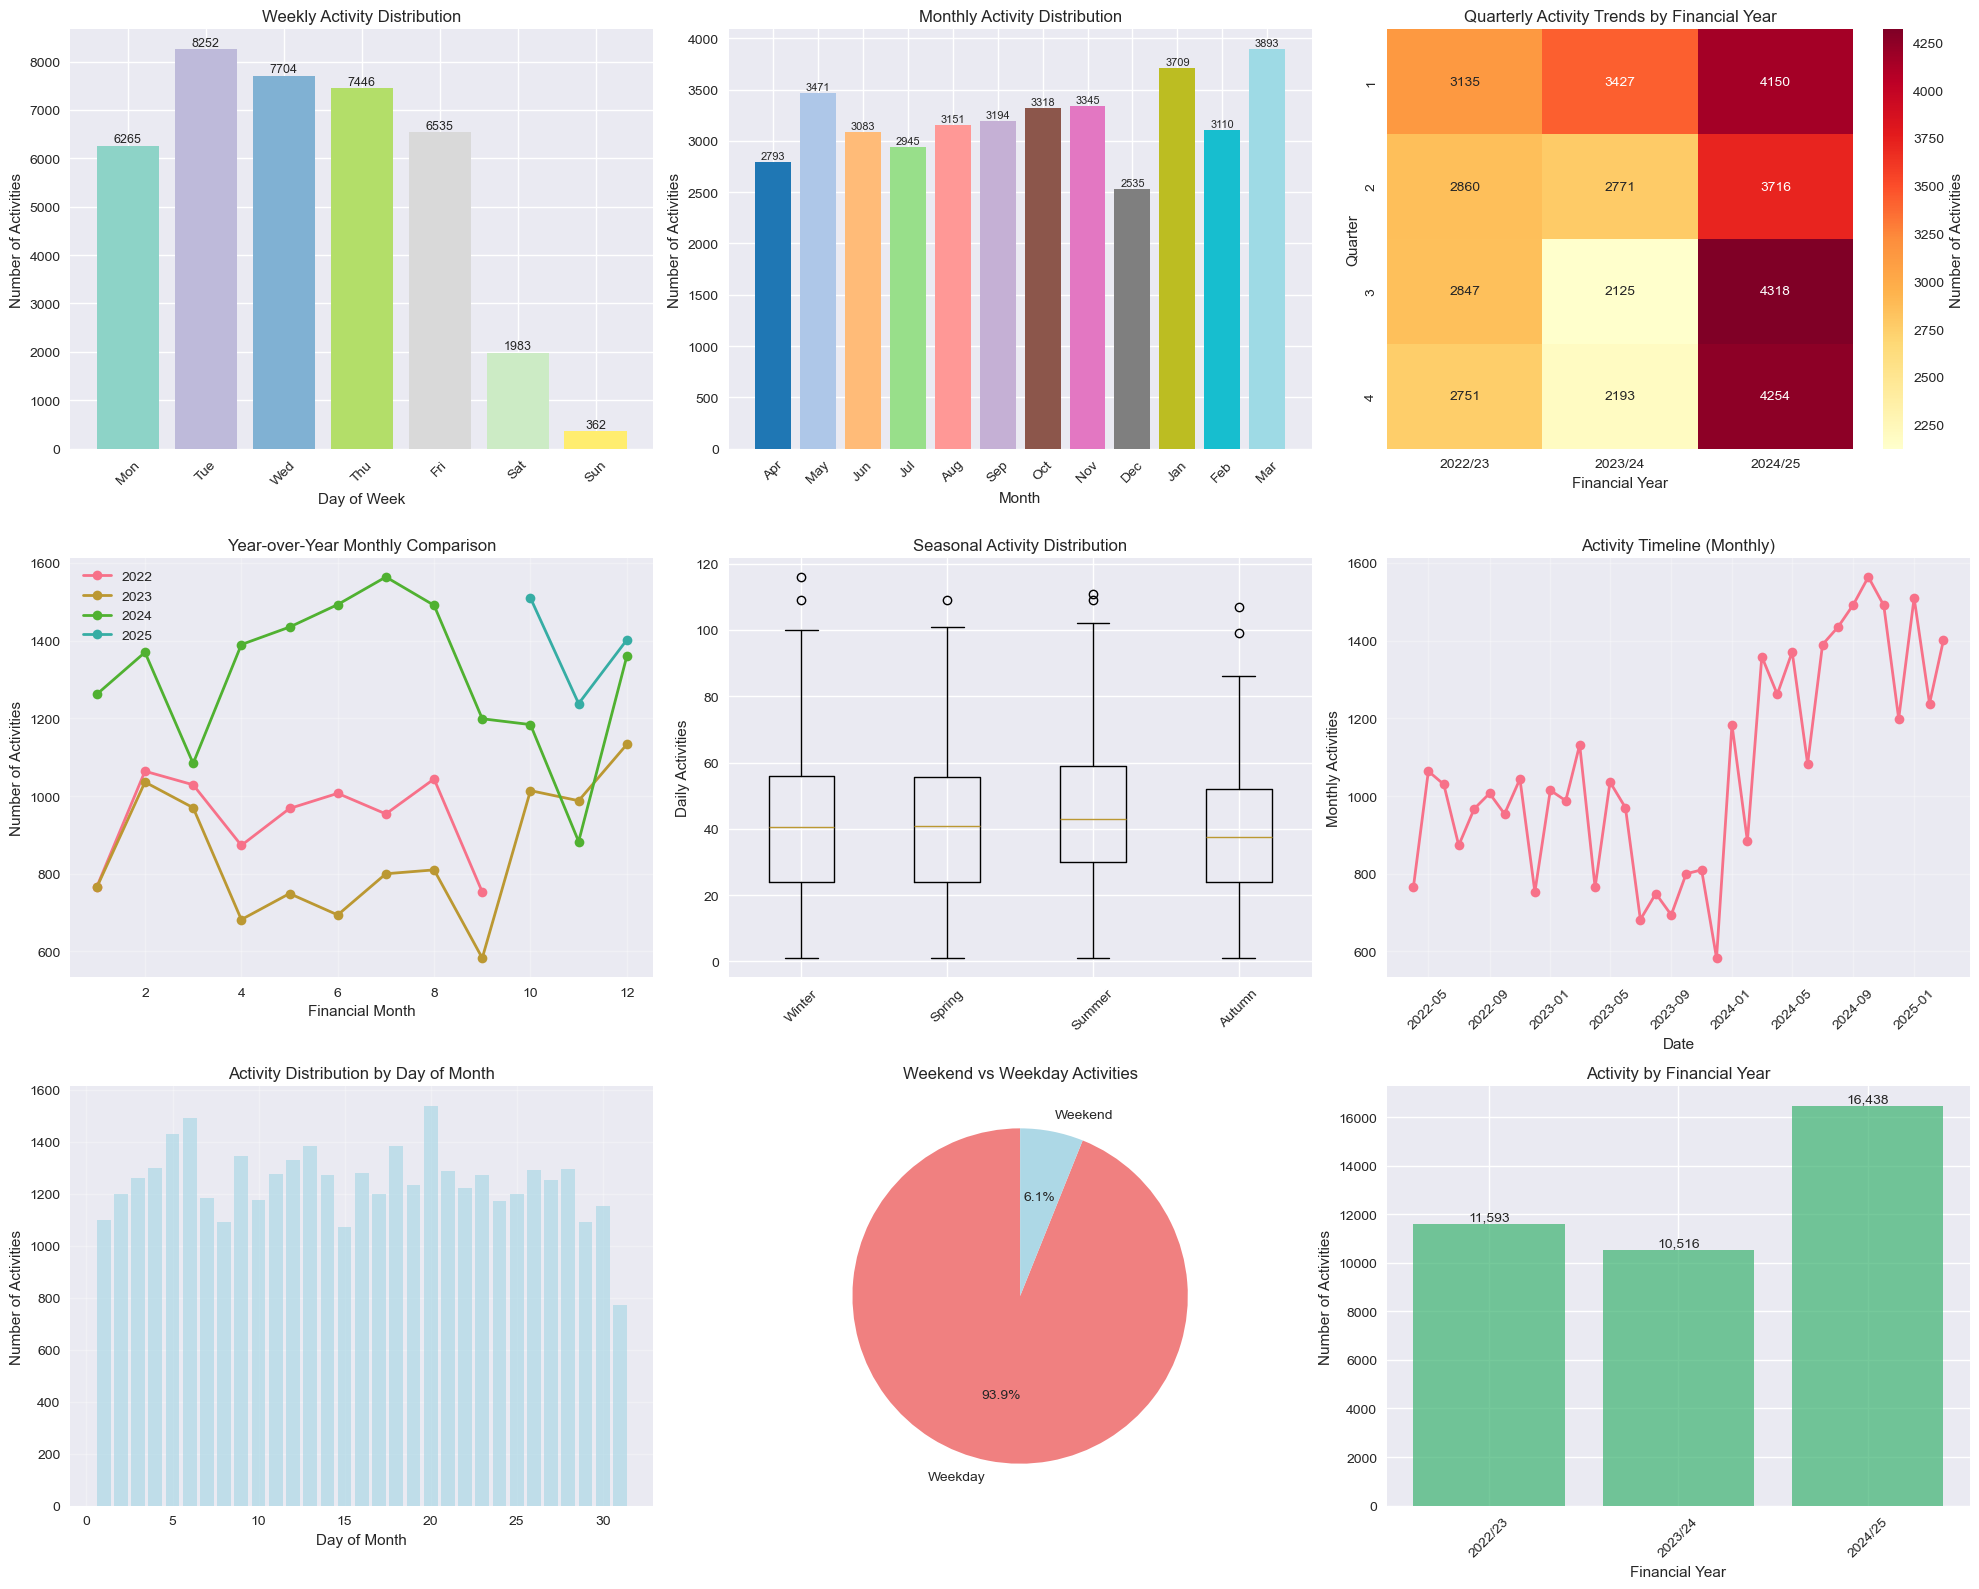

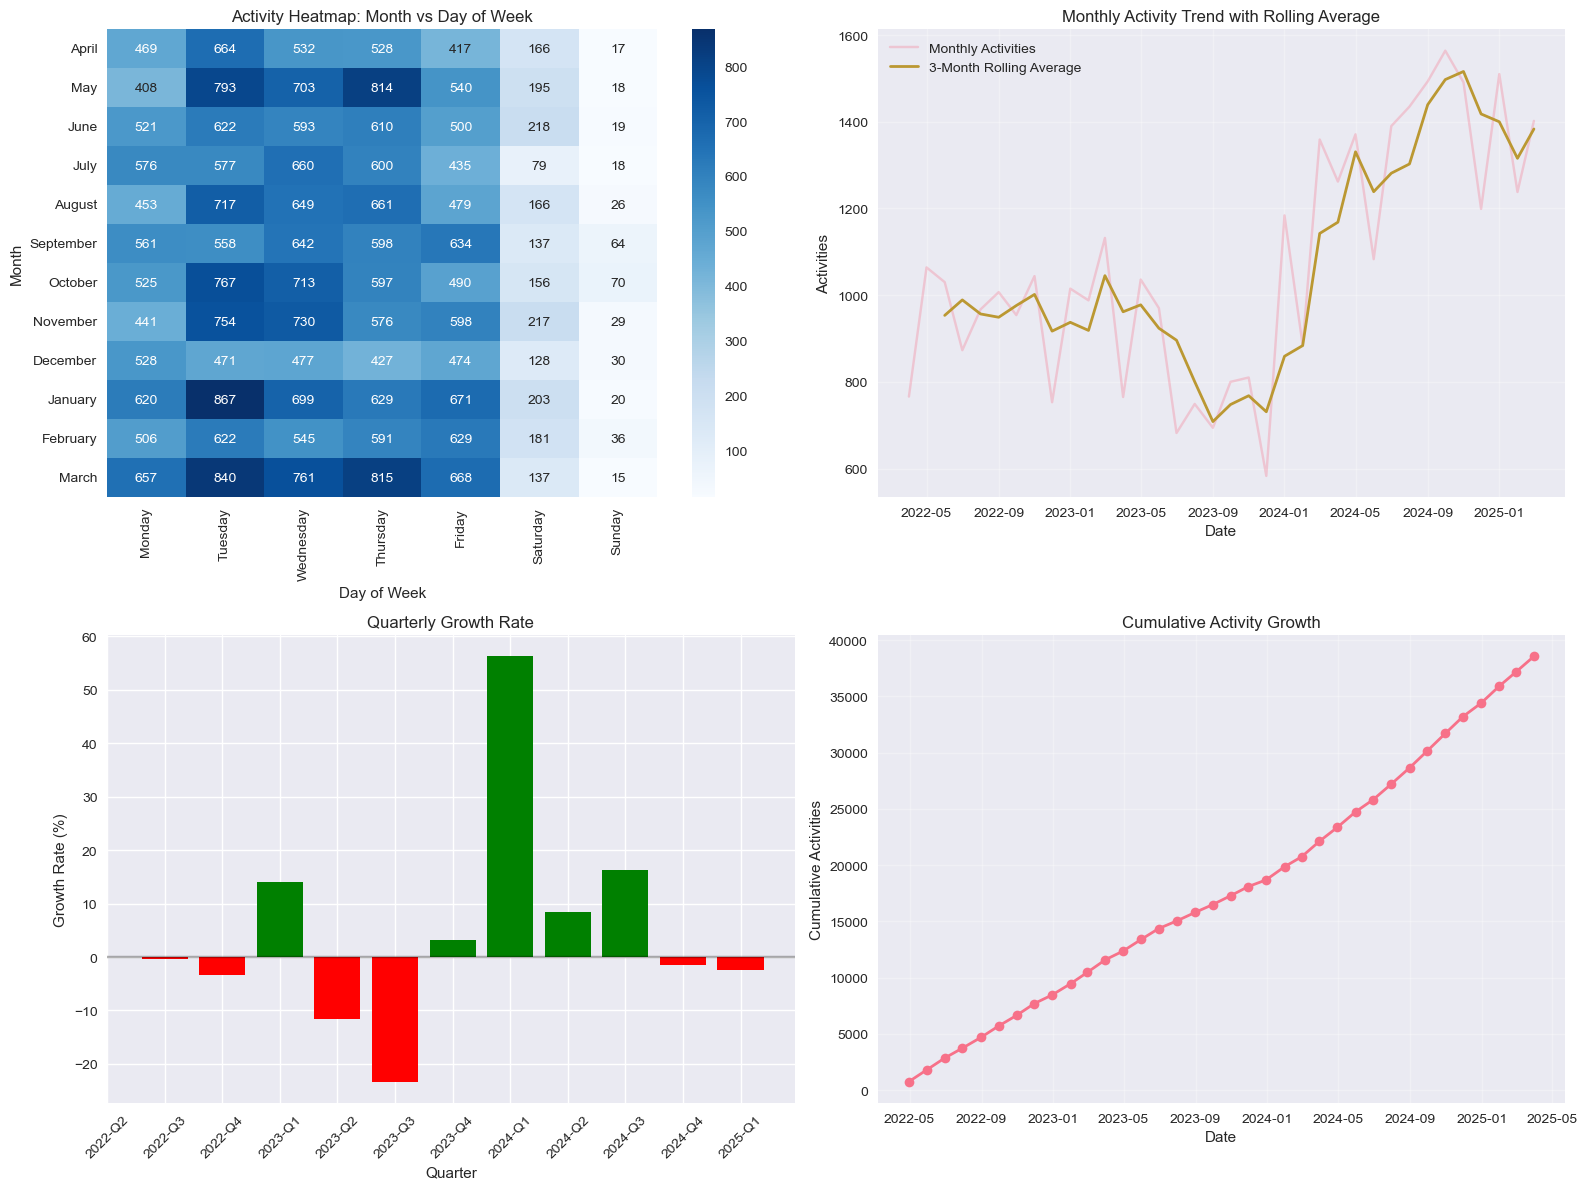

SEASONAL ACTIVITY SUMMARY

Total Activities: 38,547
Date Range: 2022-04-01 to 2025-03-31

Daily Statistics:
  Average daily activities: 40.7
  Peak day: 116 activities on 2024-09-25
  Minimum day: 1 activities

Weekly Patterns:
  Monday: 6,265 activities (16.3%)
  Tuesday: 8,252 activities (21.4%)
  Wednesday: 7,704 activities (20.0%)
  Thursday: 7,446 activities (19.3%)
  Friday: 6,535 activities (17.0%)
  Saturday: 1,983 activities (5.1%)
  Sunday: 362 activities (0.9%)

Monthly Patterns:
  April: 2,793 activities (7.2%)
  May: 3,471 activities (9.0%)
  June: 3,083 activities (8.0%)
  July: 2,945 activities (7.6%)
  August: 3,151 activities (8.2%)
  September: 3,194 activities (8.3%)
  October: 3,318 activities (8.6%)
  November: 3,345 activities (8.7%)
  December: 2,535 activities (6.6%)
  January: 3,709 activities (9.6%)
  February: 3,110 activities (8.1%)
  March: 3,893 activities (10.1%)

Seasonal Distribution:
  Summer: 10,157 activities (26.3%)
  Winter: 9,857 activities (25.6%

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import calendar

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# First, let's prepare the data
surgery['Activity Date'] = pd.to_datetime(surgery['Activity Date'])
surgery['Month'] = surgery['Activity Date'].dt.month
surgery['Quarter'] = surgery['Activity Date'].dt.quarter
surgery['Day_of_Week'] = surgery['Activity Date'].dt.day_name()
surgery['Calendar_Year'] = surgery['Activity Date'].dt.year

# Create month names for better readability
surgery['Month_Name'] = surgery['Activity Date'].dt.month_name()

# Weekly patterns
weekly_activity = surgery.groupby('Day_of_Week').size()

# Quarterly trends
quarterly_trends = surgery.groupby(['Fin Year', 'Quarter']).size().unstack()

# Year-over-year comparison
yearly_comparison = surgery.groupby(['Calendar_Year', 'Fin Month']).size().unstack()

# Monthly patterns
monthly_activity = surgery.groupby('Month_Name').size()

# Create a comprehensive visualization
fig = plt.figure(figsize=(20, 16))

# 1. Weekly Activity Pattern
plt.subplot(3, 3, 1)
# Reorder days of week for logical flow
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_ordered = weekly_activity.reindex(day_order)
bars = plt.bar(range(len(weekly_ordered)), weekly_ordered.values, 
               color=plt.cm.Set3(np.linspace(0, 1, len(weekly_ordered))))
plt.xlabel('Day of Week')
plt.ylabel('Number of Activities')
plt.title('Weekly Activity Distribution')
plt.xticks(range(len(day_order)), [day[:3] for day in day_order], rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 2. Monthly Activity Pattern
plt.subplot(3, 3, 2)
month_order = [ 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December','January', 'February', 'March']
monthly_ordered = monthly_activity.reindex(month_order)
bars = plt.bar(range(len(monthly_ordered)), monthly_ordered.values,
               color=plt.cm.tab20(np.linspace(0, 1, 12)))
plt.xlabel('Month')
plt.ylabel('Number of Activities')
plt.title('Monthly Activity Distribution')
plt.xticks(range(len(month_order)), [month[:3] for month in month_order], rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}', ha='center', va='bottom', fontsize=8)

# 3. Quarterly Trends Heatmap
plt.subplot(3, 3, 3)
sns.heatmap(quarterly_trends.T, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Activities'})
plt.title('Quarterly Activity Trends by Financial Year')
plt.ylabel('Quarter')
plt.xlabel('Financial Year')

# 4. Year-over-Year Monthly Comparison
plt.subplot(3, 3, 4)
yearly_comparison_plot = yearly_comparison.T
for year in yearly_comparison_plot.columns:
    plt.plot(yearly_comparison_plot.index, yearly_comparison_plot[year], 
             marker='o', linewidth=2, label=f'{year}')
plt.xlabel('Financial Month')
plt.ylabel('Number of Activities')
plt.title('Year-over-Year Monthly Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Seasonal Box Plot
plt.subplot(3, 3, 5)
season_map = {9: 'Winter', 10: 'Winter', 11: 'Winter',
              12: 'Spring', 1: 'Spring', 2: 'Spring',
              3: 'Summer', 4: 'Summer', 5: 'Summer',
              6: 'Autumn', 7: 'Autumn', 8: 'Autumn'}
surgery['Season'] = surgery['Month'].map(season_map)

seasonal_data = []
for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    season_activities = surgery[surgery['Season'] == season].groupby('Activity Date').size()
    seasonal_data.append(season_activities.values)

plt.boxplot(seasonal_data, labels=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.ylabel('Daily Activities')
plt.title('Seasonal Activity Distribution')
plt.xticks(rotation=45)

# 6. Monthly Activity Timeline
plt.subplot(3, 3, 6)
monthly_timeline = surgery.groupby(surgery['Activity Date'].dt.to_period('M')).size()
monthly_timeline.index = monthly_timeline.index.to_timestamp()
plt.plot(monthly_timeline.index, monthly_timeline.values, marker='o', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Monthly Activities')
plt.title('Activity Timeline (Monthly)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 7. Day of Month Pattern
plt.subplot(3, 3, 7)
surgery['Day_of_Month'] = surgery['Activity Date'].dt.day
day_of_month_activity = surgery.groupby('Day_of_Month').size()
plt.bar(day_of_month_activity.index, day_of_month_activity.values, 
        color='lightblue', alpha=0.7)
plt.xlabel('Day of Month')
plt.ylabel('Number of Activities')
plt.title('Activity Distribution by Day of Month')
plt.grid(True, alpha=0.3)

# 8. Weekend vs Weekday Analysis
plt.subplot(3, 3, 8)
surgery['Is_Weekend'] = surgery['Day_of_Week'].isin(['Saturday', 'Sunday'])
weekend_comparison = surgery.groupby('Is_Weekend').size()
labels = ['Weekday', 'Weekend']
colors = ['lightcoral', 'lightblue']
plt.pie(weekend_comparison.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Weekend vs Weekday Activities')

# 9. Financial Year Comparison
plt.subplot(3, 3, 9)
fin_year_activity = surgery.groupby('Fin Year').size()
bars = plt.bar(fin_year_activity.index, fin_year_activity.values, 
               color='mediumseagreen', alpha=0.7)
plt.xlabel('Financial Year')
plt.ylabel('Number of Activities')
plt.title('Activity by Financial Year')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Additional detailed analysis plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Heatmap of activities by month and day of week
monthly_weekly = surgery.groupby(['Month_Name', 'Day_of_Week']).size().unstack(fill_value=0)
monthly_weekly = monthly_weekly.reindex(month_order)
monthly_weekly = monthly_weekly[day_order]

sns.heatmap(monthly_weekly, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Activity Heatmap: Month vs Day of Week')
axes[0,0].set_xlabel('Day of Week')
axes[0,0].set_ylabel('Month')

# 2. Rolling average trend
monthly_timeline_rolling = monthly_timeline.rolling(window=3).mean()
axes[0,1].plot(monthly_timeline.index, monthly_timeline.values, 
               alpha=0.3, label='Monthly Activities')
axes[0,1].plot(monthly_timeline_rolling.index, monthly_timeline_rolling.values, 
               linewidth=2, label='3-Month Rolling Average')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Activities')
axes[0,1].set_title('Monthly Activity Trend with Rolling Average')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Quarterly growth rate
quarterly_totals = surgery.groupby(['Calendar_Year', 'Quarter']).size().reset_index()
quarterly_totals['Year_Quarter'] = quarterly_totals['Calendar_Year'].astype(str) + '-Q' + quarterly_totals['Quarter'].astype(str)
quarterly_totals['Growth_Rate'] = quarterly_totals[0].pct_change() * 100

axes[1,0].bar(range(len(quarterly_totals)), quarterly_totals['Growth_Rate'], 
              color=['red' if x < 0 else 'green' for x in quarterly_totals['Growth_Rate']])
axes[1,0].set_xlabel('Quarter')
axes[1,0].set_ylabel('Growth Rate (%)')
axes[1,0].set_title('Quarterly Growth Rate')
axes[1,0].set_xticks(range(len(quarterly_totals)))
axes[1,0].set_xticklabels(quarterly_totals['Year_Quarter'], rotation=45)
axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 4. Cumulative activities over time
surgery_sorted = surgery.sort_values('Activity Date')
surgery_sorted['Cumulative_Count'] = range(1, len(surgery_sorted) + 1)
sample_dates = surgery_sorted.groupby(surgery_sorted['Activity Date'].dt.to_period('M')).last()

axes[1,1].plot(sample_dates['Activity Date'], sample_dates['Cumulative_Count'], 
               marker='o', linewidth=2)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Cumulative Activities')
axes[1,1].set_title('Cumulative Activity Growth')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics table
print("="*60)
print("SEASONAL ACTIVITY SUMMARY")
print("="*60)

print(f"\nTotal Activities: {len(surgery):,}")
print(f"Date Range: {surgery['Activity Date'].min().strftime('%Y-%m-%d')} to {surgery['Activity Date'].max().strftime('%Y-%m-%d')}")

print(f"\nDaily Statistics:")
daily_stats = surgery.groupby('Activity Date').size()
print(f"  Average daily activities: {daily_stats.mean():.1f}")
print(f"  Peak day: {daily_stats.max()} activities on {daily_stats.idxmax().strftime('%Y-%m-%d')}")
print(f"  Minimum day: {daily_stats.min()} activities")

print(f"\nWeekly Patterns:")
for day, count in weekly_ordered.items():
    percentage = (count / len(surgery)) * 100
    print(f"  {day}: {count:,} activities ({percentage:.1f}%)")

print(f"\nMonthly Patterns:")
for month, count in monthly_ordered.items():
    if pd.notna(count):
        percentage = (count / len(surgery)) * 100
        print(f"  {month}: {int(count):,} activities ({percentage:.1f}%)")

print(f"\nSeasonal Distribution:")
seasonal_dist = surgery['Season'].value_counts()
for season, count in seasonal_dist.items():
    percentage = (count / len(surgery)) * 100
    print(f"  {season}: {count:,} activities ({percentage:.1f}%)")

In [33]:
# LSOA-level analysis
lsoa_activity = surgery.groupby('LSOA').agg({
    'Local Patient Identifier': 'count',
    'Provider': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None,
    'HRG': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None
}).rename(columns={'Local Patient Identifier': 'Total_Procedures'})

# Provider catchment analysis
provider_lsoa = surgery.groupby('Provider')['LSOA'].nunique().sort_values(ascending=False)

# Geographic distribution of procedure types
hrg_by_lsoa = surgery.groupby(['LSOA', 'HRG']).size().unstack(fill_value=0)

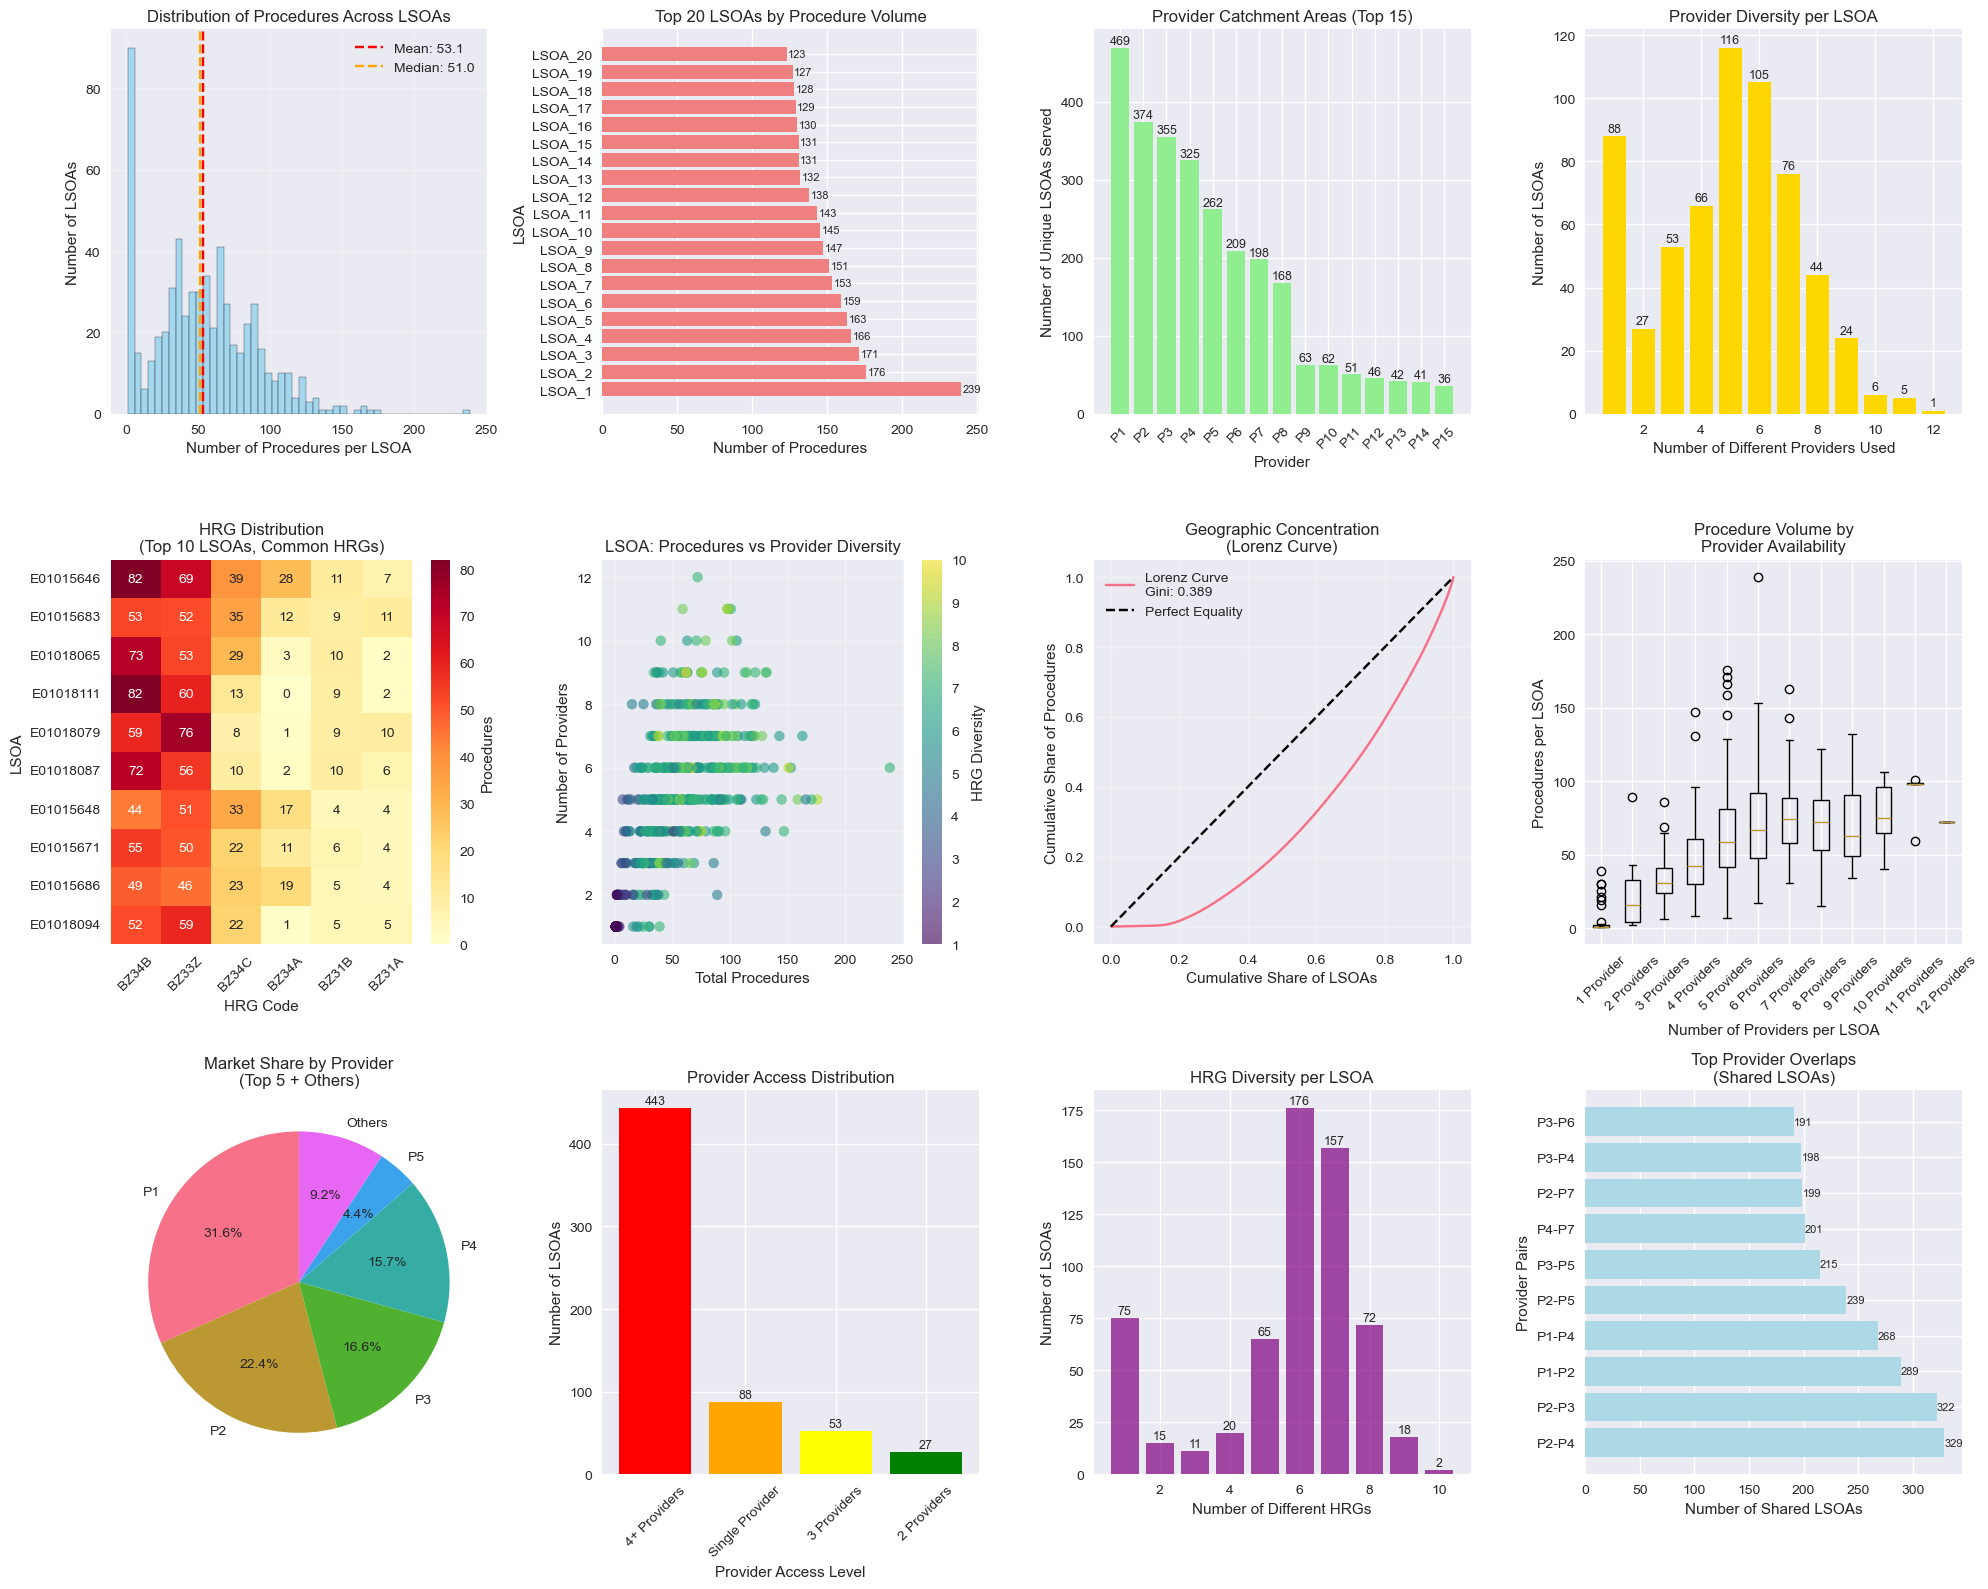

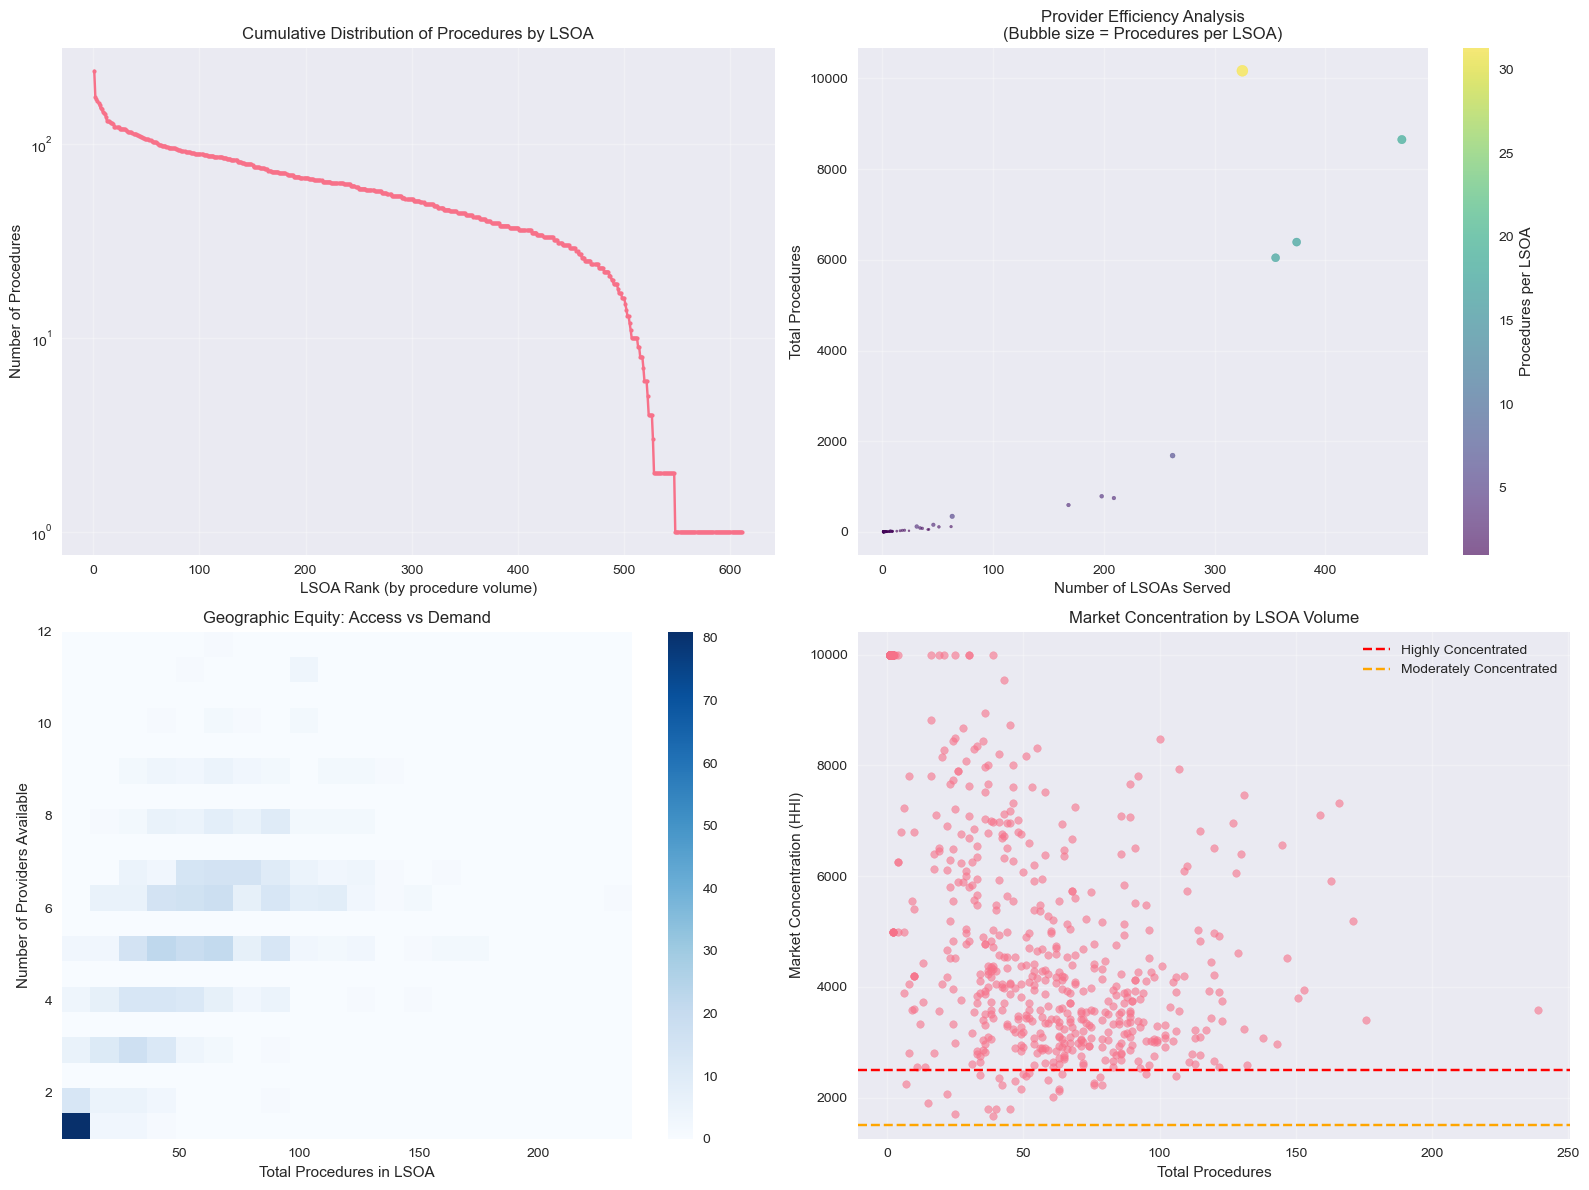

GEOGRAPHIC AND LSOA-LEVEL ANALYSIS SUMMARY

LSOA Statistics:
  Total LSOAs: 611
  LSOAs with procedures: 611
  Average procedures per LSOA: 53.1
  Median procedures per LSOA: 51.0
  Max procedures in single LSOA: 239
  Geographic concentration (Gini): 0.389

Provider Coverage:
  Total providers: 81
  Average LSOAs per provider: 37.1
  Provider with largest catchment: 469 LSOAs
  Providers serving only 1 LSOA: 32

Access Patterns:
  4+ Providers: 443 LSOAs (72.5%)
  Single Provider: 88 LSOAs (14.4%)
  3 Providers: 53 LSOAs (8.7%)
  2 Providers: 27 LSOAs (4.4%)

Procedure Diversity:
  Average HRG types per LSOA: 5.7
  Max HRG diversity in single LSOA: 10
  LSOAs with only 1 HRG type: 75

Top 5 LSOAs by procedure volume:
  1. E01015646: 239 procedures, 6 providers
  2. E01015683: 176 procedures, 5 providers
  3. E01018065: 171 procedures, 5 providers
  4. E01018111: 166 procedures, 5 providers
  5. E01018079: 163 procedures, 7 providers

Provider Market Leaders:
  1. Provider: 469 LSOAs, 

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Prepare the data
lsoa_activity = surgery.groupby('LSOA').agg({
    'Local Patient Identifier': 'count',
    'Provider': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None,
    'HRG': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None
}).rename(columns={'Local Patient Identifier': 'Total_Procedures'})

# Provider catchment analysis
provider_lsoa = surgery.groupby('Provider')['LSOA'].nunique().sort_values(ascending=False)

# Geographic distribution of procedure types
hrg_by_lsoa = surgery.groupby(['LSOA', 'HRG']).size().unstack(fill_value=0)

# Additional metrics
lsoa_activity['Provider_Count'] = surgery.groupby('LSOA')['Provider'].nunique()
lsoa_activity['HRG_Diversity'] = surgery.groupby('LSOA')['HRG'].nunique()

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 16))

# 1. Distribution of procedures per LSOA
plt.subplot(3, 4, 1)
plt.hist(lsoa_activity['Total_Procedures'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Number of Procedures per LSOA')
plt.ylabel('Number of LSOAs')
plt.title('Distribution of Procedures Across LSOAs')
plt.grid(True, alpha=0.3)

# Add statistics
mean_procedures = lsoa_activity['Total_Procedures'].mean()
median_procedures = lsoa_activity['Total_Procedures'].median()
plt.axvline(mean_procedures, color='red', linestyle='--', label=f'Mean: {mean_procedures:.1f}')
plt.axvline(median_procedures, color='orange', linestyle='--', label=f'Median: {median_procedures:.1f}')
plt.legend()

# 2. Top 20 LSOAs by procedure volume
plt.subplot(3, 4, 2)
top_20_lsoa = lsoa_activity.nlargest(20, 'Total_Procedures')
bars = plt.barh(range(len(top_20_lsoa)), top_20_lsoa['Total_Procedures'], color='lightcoral')
plt.xlabel('Number of Procedures')
plt.ylabel('LSOA')
plt.title('Top 20 LSOAs by Procedure Volume')
plt.yticks(range(len(top_20_lsoa)), [f'LSOA_{i+1}' for i in range(len(top_20_lsoa))])

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2., 
             f'{int(width)}', ha='left', va='center', fontsize=8)

# 3. Provider catchment analysis
plt.subplot(3, 4, 3)
top_providers = provider_lsoa.head(15)
bars = plt.bar(range(len(top_providers)), top_providers.values, color='lightgreen')
plt.xlabel('Provider')
plt.ylabel('Number of Unique LSOAs Served')
plt.title('Provider Catchment Areas (Top 15)')
plt.xticks(range(len(top_providers)), 
           [f'P{i+1}' for i in range(len(top_providers))], rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 4. LSOA Provider Diversity
plt.subplot(3, 4, 4)
provider_diversity = lsoa_activity['Provider_Count'].value_counts().sort_index()
bars = plt.bar(provider_diversity.index, provider_diversity.values, color='gold')
plt.xlabel('Number of Different Providers Used')
plt.ylabel('Number of LSOAs')
plt.title('Provider Diversity per LSOA')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 5. HRG Distribution across LSOAs (Heatmap)
plt.subplot(3, 4, 5)
# Select top 10 LSOAs and most common HRGs for readability
top_lsoas = lsoa_activity.nlargest(10, 'Total_Procedures').index
common_hrgs = hrg_by_lsoa.sum().nlargest(6).index
hrg_subset = hrg_by_lsoa.loc[top_lsoas, common_hrgs]

sns.heatmap(hrg_subset, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Procedures'})
plt.title('HRG Distribution\n(Top 10 LSOAs, Common HRGs)')
plt.xlabel('HRG Code')
plt.ylabel('LSOA')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# 6. Procedures vs Provider Diversity Scatter
plt.subplot(3, 4, 6)
scatter = plt.scatter(lsoa_activity['Total_Procedures'], 
                     lsoa_activity['Provider_Count'],
                     alpha=0.6, s=50, c=lsoa_activity['HRG_Diversity'], 
                     cmap='viridis')
plt.xlabel('Total Procedures')
plt.ylabel('Number of Providers')
plt.title('LSOA: Procedures vs Provider Diversity')
plt.colorbar(scatter, label='HRG Diversity')
plt.grid(True, alpha=0.3)

# 7. Geographic concentration analysis
plt.subplot(3, 4, 7)
# Gini coefficient calculation for procedure distribution
def gini_coefficient(x):
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (n + 1 - 2 * np.sum(cumsum) / cumsum[-1]) / n

gini_proc = gini_coefficient(lsoa_activity['Total_Procedures'])

# Lorenz curve
sorted_procedures = np.sort(lsoa_activity['Total_Procedures'])
cumulative_procedures = np.cumsum(sorted_procedures)
cumulative_procedures = cumulative_procedures / cumulative_procedures[-1]
cumulative_lsoas = np.arange(1, len(sorted_procedures) + 1) / len(sorted_procedures)

plt.plot(cumulative_lsoas, cumulative_procedures, label=f'Lorenz Curve\nGini: {gini_proc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Equality')
plt.xlabel('Cumulative Share of LSOAs')
plt.ylabel('Cumulative Share of Procedures')
plt.title('Geographic Concentration\n(Lorenz Curve)')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. Box plot of procedures by provider count
plt.subplot(3, 4, 8)
provider_groups = []
labels = []
for count in sorted(lsoa_activity['Provider_Count'].unique()):
    group_data = lsoa_activity[lsoa_activity['Provider_Count'] == count]['Total_Procedures']
    provider_groups.append(group_data.values)
    labels.append(f'{count} Provider{"s" if count > 1 else ""}')

plt.boxplot(provider_groups, labels=labels)
plt.xlabel('Number of Providers per LSOA')
plt.ylabel('Procedures per LSOA')
plt.title('Procedure Volume by\nProvider Availability')
plt.xticks(rotation=45)

# 9. Market share by top providers
plt.subplot(3, 4, 9)
top_5_providers = surgery['Provider'].value_counts().head(5)
other_procedures = surgery['Provider'].value_counts().iloc[5:].sum()
plot_data = list(top_5_providers.values) + [other_procedures]
plot_labels = [f'P{i+1}' for i in range(5)] + ['Others']

plt.pie(plot_data, labels=plot_labels, autopct='%1.1f%%', startangle=90)
plt.title('Market Share by Provider\n(Top 5 + Others)')

# 10. LSOA Access Patterns
plt.subplot(3, 4, 10)
# Calculate average distance to providers (proxy using provider count)
access_categories = pd.cut(lsoa_activity['Provider_Count'], 
                          bins=[0, 1, 2, 3, float('inf')], 
                          labels=['Single Provider', '2 Providers', '3 Providers', '4+ Providers'])
access_dist = access_categories.value_counts()

bars = plt.bar(range(len(access_dist)), access_dist.values, 
               color=['red', 'orange', 'yellow', 'green'])
plt.xlabel('Provider Access Level')
plt.ylabel('Number of LSOAs')
plt.title('Provider Access Distribution')
plt.xticks(range(len(access_dist)), access_dist.index, rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 11. HRG Diversity Distribution
plt.subplot(3, 4, 11)
hrg_diversity_dist = lsoa_activity['HRG_Diversity'].value_counts().sort_index()
bars = plt.bar(hrg_diversity_dist.index, hrg_diversity_dist.values, color='purple', alpha=0.7)
plt.xlabel('Number of Different HRGs')
plt.ylabel('Number of LSOAs')
plt.title('HRG Diversity per LSOA')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 12. Provider Network Analysis - FIXED VERSION
plt.subplot(3, 4, 12)
# Create a simplified provider overlap analysis
top_10_providers = surgery['Provider'].value_counts().head(10).index
overlap_data = []

for i, prov1 in enumerate(top_10_providers):
    for j, prov2 in enumerate(top_10_providers):
        if i < j:  # Only calculate upper triangle to avoid duplicates
            # Get LSOAs served by each provider
            lsoas_prov1 = set(surgery[surgery['Provider'] == prov1]['LSOA'].unique())
            lsoas_prov2 = set(surgery[surgery['Provider'] == prov2]['LSOA'].unique())
            overlap = len(lsoas_prov1.intersection(lsoas_prov2))
            overlap_data.append({
                'Provider1': f'P{i+1}',
                'Provider2': f'P{j+1}',
                'Overlap': overlap
            })

# Create a simple bar chart instead of heatmap for overlap
if overlap_data:
    overlap_df = pd.DataFrame(overlap_data)
    top_overlaps = overlap_df.nlargest(10, 'Overlap')
    
    bars = plt.barh(range(len(top_overlaps)), top_overlaps['Overlap'], color='lightblue')
    plt.xlabel('Number of Shared LSOAs')
    plt.ylabel('Provider Pairs')
    plt.title('Top Provider Overlaps\n(Shared LSOAs)')
    
    # Create labels for provider pairs
    pair_labels = [f"{row['Provider1']}-{row['Provider2']}" for _, row in top_overlaps.iterrows()]
    plt.yticks(range(len(top_overlaps)), pair_labels)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2., 
                 f'{int(width)}', ha='left', va='center', fontsize=8)
else:
    plt.text(0.5, 0.5, 'No overlap data\navailable', ha='center', va='center', 
             transform=plt.gca().transAxes)
    plt.title('Provider Overlap Analysis')

plt.tight_layout()
plt.show()

# Additional detailed analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cumulative distribution of procedures
sorted_procedures_desc = np.sort(lsoa_activity['Total_Procedures'])[::-1]
axes[0,0].plot(range(1, len(lsoa_activity) + 1), sorted_procedures_desc, marker='o', markersize=3)
axes[0,0].set_xlabel('LSOA Rank (by procedure volume)')
axes[0,0].set_ylabel('Number of Procedures')
axes[0,0].set_title('Cumulative Distribution of Procedures by LSOA')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_yscale('log')

# 2. Provider efficiency analysis
provider_efficiency = surgery.groupby('Provider').agg({
    'LSOA': 'nunique',
    'Local Patient Identifier': 'count'
}).rename(columns={'LSOA': 'LSOAs_Served', 'Local Patient Identifier': 'Total_Procedures'})
provider_efficiency['Procedures_per_LSOA'] = provider_efficiency['Total_Procedures'] / provider_efficiency['LSOAs_Served']

scatter = axes[0,1].scatter(provider_efficiency['LSOAs_Served'], 
                           provider_efficiency['Total_Procedures'],
                           s=provider_efficiency['Procedures_per_LSOA']*2,
                           alpha=0.6, c=provider_efficiency['Procedures_per_LSOA'], 
                           cmap='viridis')
axes[0,1].set_xlabel('Number of LSOAs Served')
axes[0,1].set_ylabel('Total Procedures')
axes[0,1].set_title('Provider Efficiency Analysis\n(Bubble size = Procedures per LSOA)')
plt.colorbar(scatter, ax=axes[0,1], label='Procedures per LSOA')
axes[0,1].grid(True, alpha=0.3)

# 3. Geographic equity analysis
h = axes[1,0].hist2d(lsoa_activity['Total_Procedures'], lsoa_activity['Provider_Count'], 
                     bins=20, cmap='Blues')
axes[1,0].set_xlabel('Total Procedures in LSOA')
axes[1,0].set_ylabel('Number of Providers Available')
axes[1,0].set_title('Geographic Equity: Access vs Demand')
plt.colorbar(h[3], ax=axes[1,0])

# 4. Market concentration over geography
# Calculate HHI (Herfindahl-Hirschman Index) for each LSOA
def calculate_hhi(group):
    if len(group) == 0:
        return 0
    shares = group.value_counts(normalize=True)
    return (shares ** 2).sum() * 10000  # HHI scale

lsoa_hhi = surgery.groupby('LSOA')['Provider'].apply(calculate_hhi)
lsoa_activity['Market_Concentration'] = lsoa_hhi

axes[1,1].scatter(lsoa_activity['Total_Procedures'], 
                  lsoa_activity['Market_Concentration'],
                  alpha=0.6, s=30)
axes[1,1].set_xlabel('Total Procedures')
axes[1,1].set_ylabel('Market Concentration (HHI)')
axes[1,1].set_title('Market Concentration by LSOA Volume')
axes[1,1].axhline(y=2500, color='red', linestyle='--', label='Highly Concentrated')
axes[1,1].axhline(y=1500, color='orange', linestyle='--', label='Moderately Concentrated')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary Statistics
print("="*70)
print("GEOGRAPHIC AND LSOA-LEVEL ANALYSIS SUMMARY")
print("="*70)

print(f"\nLSOA Statistics:")
print(f"  Total LSOAs: {len(lsoa_activity):,}")
print(f"  LSOAs with procedures: {(lsoa_activity['Total_Procedures'] > 0).sum():,}")
print(f"  Average procedures per LSOA: {lsoa_activity['Total_Procedures'].mean():.1f}")
print(f"  Median procedures per LSOA: {lsoa_activity['Total_Procedures'].median():.1f}")
print(f"  Max procedures in single LSOA: {lsoa_activity['Total_Procedures'].max():,}")
print(f"  Geographic concentration (Gini): {gini_proc:.3f}")

print(f"\nProvider Coverage:")
print(f"  Total providers: {len(provider_lsoa)}")
print(f"  Average LSOAs per provider: {provider_lsoa.mean():.1f}")
print(f"  Provider with largest catchment: {provider_lsoa.max()} LSOAs")
print(f"  Providers serving only 1 LSOA: {(provider_lsoa == 1).sum()}")

print(f"\nAccess Patterns:")
access_summary = access_categories.value_counts()
for category, count in access_summary.items():
    percentage = (count / len(lsoa_activity)) * 100
    print(f"  {category}: {count:,} LSOAs ({percentage:.1f}%)")

print(f"\nProcedure Diversity:")
print(f"  Average HRG types per LSOA: {lsoa_activity['HRG_Diversity'].mean():.1f}")
print(f"  Max HRG diversity in single LSOA: {lsoa_activity['HRG_Diversity'].max()}")
print(f"  LSOAs with only 1 HRG type: {(lsoa_activity['HRG_Diversity'] == 1).sum()}")

# Top and bottom LSOAs
print(f"\nTop 5 LSOAs by procedure volume:")
top_5_lsoa = lsoa_activity.nlargest(5, 'Total_Procedures')
for i, (lsoa, row) in enumerate(top_5_lsoa.iterrows(), 1):
    print(f"  {i}. {lsoa}: {row['Total_Procedures']} procedures, {row['Provider_Count']} providers")

print(f"\nProvider Market Leaders:")
top_5_provider_coverage = provider_lsoa.head(5)
for i, (provider, lsoa_count) in enumerate(top_5_provider_coverage.items(), 1):
    total_procedures = surgery[surgery['Provider'] == provider].shape[0]
    print(f"  {i}. Provider: {lsoa_count} LSOAs, {total_procedures:,} total procedures")

Sample Fin Month values:
[ 6  9 12 11  7  8  2 10  3  5]
Data type: int64


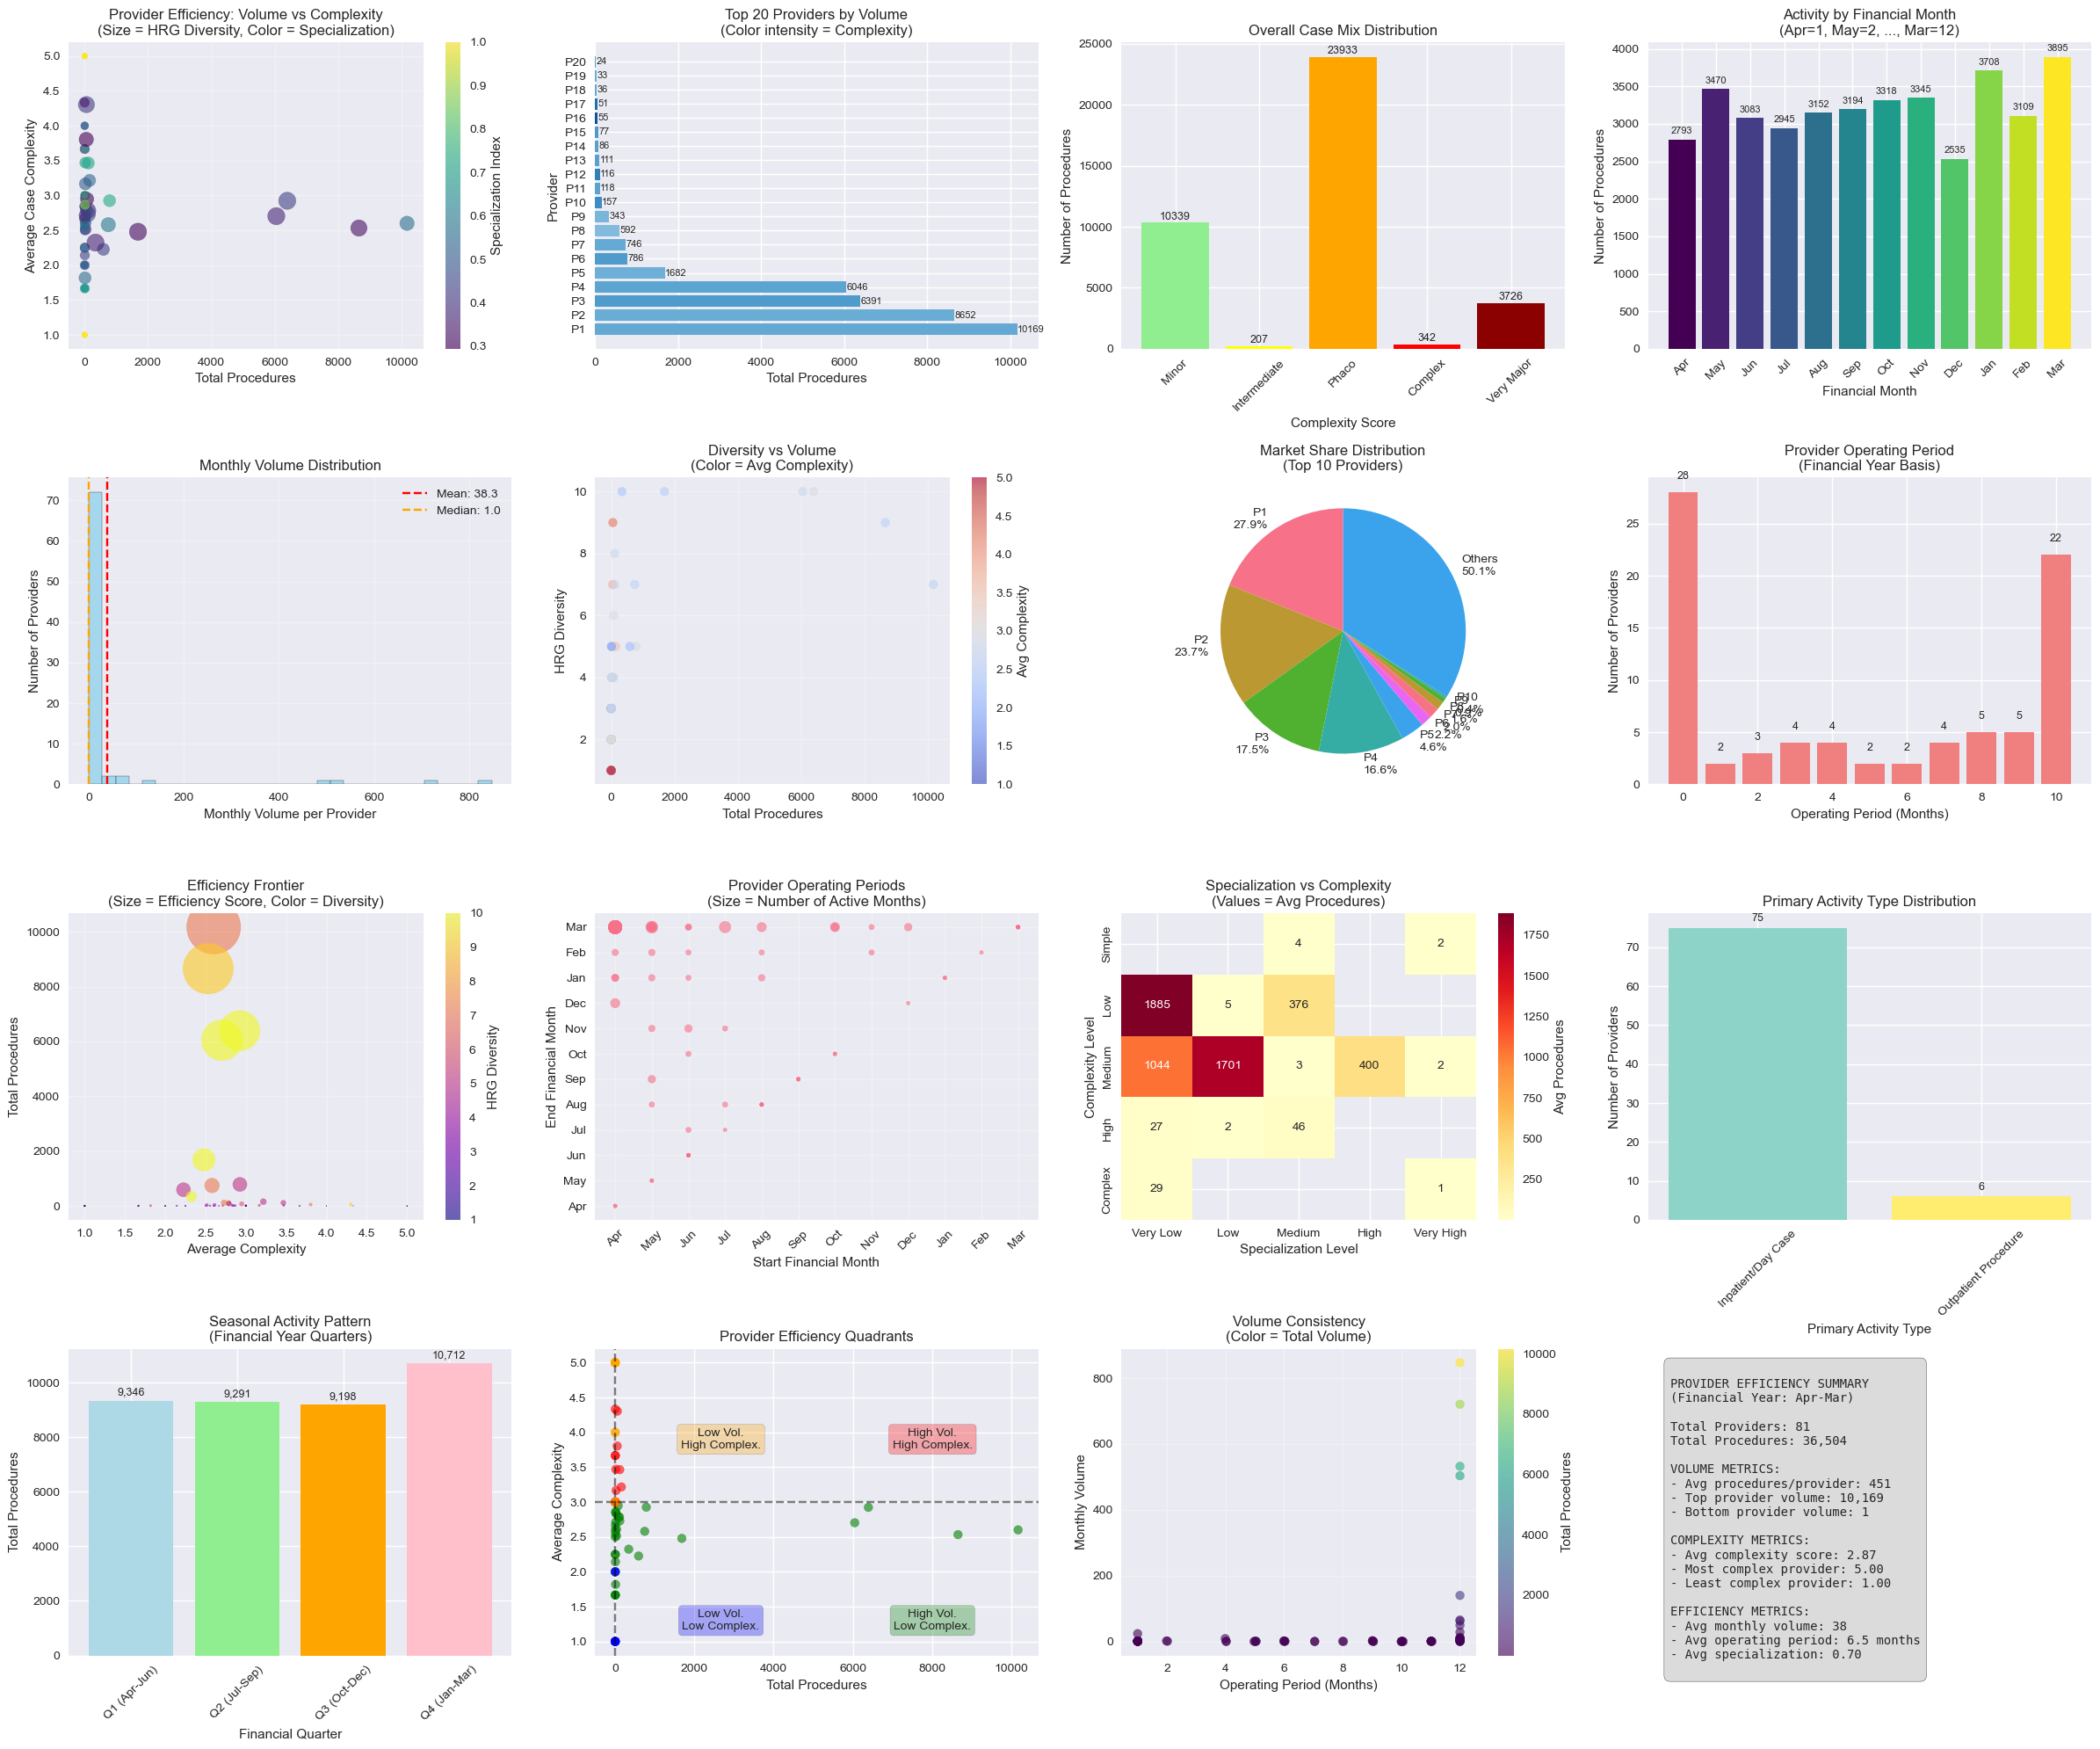

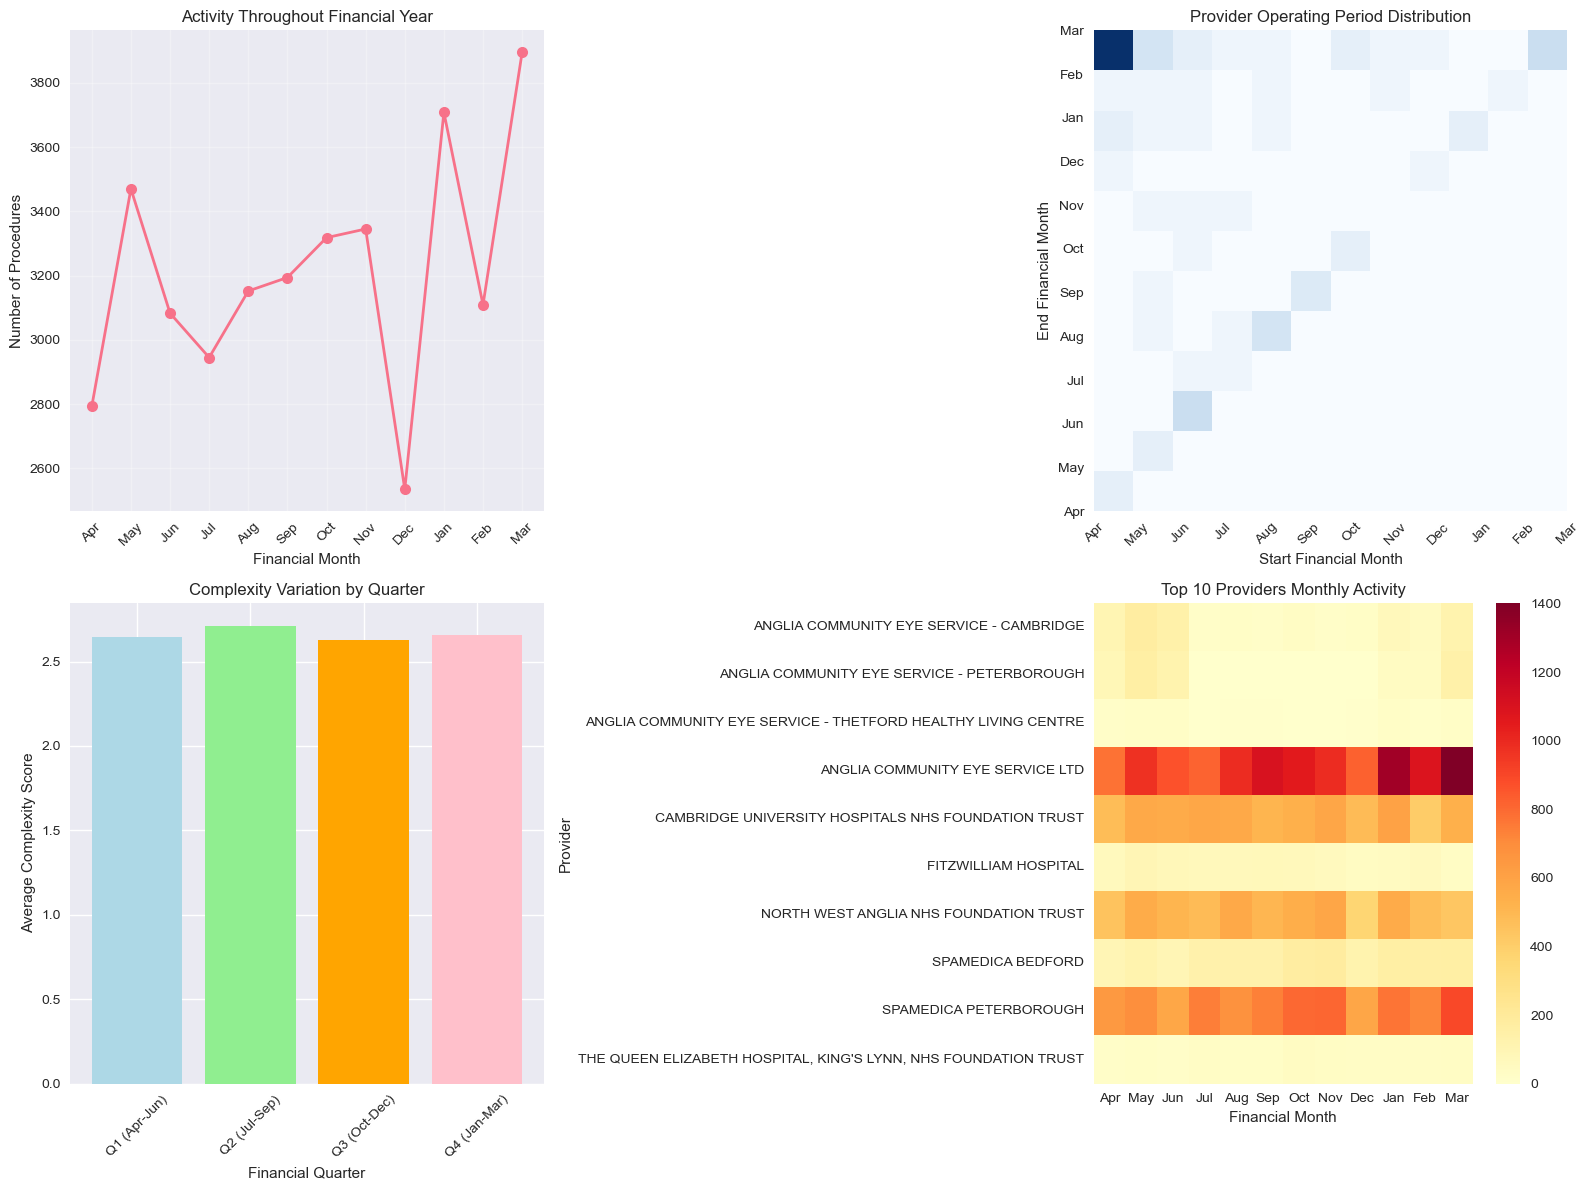

PROVIDER EFFICIENCY ANALYSIS - FINANCIAL YEAR BASIS
Financial Year: April (Month 1) to March (Month 12)

SEASONAL PATTERNS:
Q1 (Apr-Jun): 9,346 procedures (24.2%), Avg Complexity: 2.64
Q2 (Jul-Sep): 9,291 procedures (24.1%), Avg Complexity: 2.71
Q3 (Oct-Dec): 9,198 procedures (23.9%), Avg Complexity: 2.63
Q4 (Jan-Mar): 10,712 procedures (27.8%), Avg Complexity: 2.66

TOP 10 PROVIDERS BY VOLUME:
 1. Provider ANGLIA COMMUNITY EYE SERVICE LTD: 10,169 procedures, Operating: Apr-Mar (12.0 months), Monthly Avg: 847
 2. Provider SPAMEDICA PETERBOROUGH: 8,652 procedures, Operating: Apr-Mar (12.0 months), Monthly Avg: 721
 3. Provider CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION TRUST: 6,391 procedures, Operating: Apr-Mar (12.0 months), Monthly Avg: 532
 4. Provider NORTH WEST ANGLIA NHS FOUNDATION TRUST: 6,046 procedures, Operating: Apr-Mar (12.0 months), Monthly Avg: 504
 5. Provider SPAMEDICA BEDFORD: 1,682 procedures, Operating: Apr-Mar (12.0 months), Monthly Avg: 140
 6. Provider ANGLIA C

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# First, let's inspect the date format
print("Sample Fin Month values:")
print(surgery['Fin Month'].unique()[:10])
print(f"Data type: {surgery['Fin Month'].dtype}")

# Prepare the data properly
provider_metrics = surgery.groupby('Provider').agg({
    'Local Patient Identifier': 'count',
    'HRG': ['nunique', lambda x: x.value_counts().iloc[0] if len(x) > 0 else 0],
    'Activity Type': lambda x: x.value_counts().index[0],
    'Fin Month': ['min', 'max']
}).round(2)

# Flatten column names
provider_metrics.columns = ['Total_Procedures', 'HRG_Diversity', 'Most_Common_HRG_Count', 'Primary_Activity_Type', 'Start_Month', 'End_Month']

# Case mix complexity by provider
complexity_mapping = {
    'BZ30A': 4, 'BZ30B': 4,  # Complex
    'BZ31A': 5, 'BZ31B': 5,  # Very Major
    'BZ32A': 2, 'BZ32B': 2,  # Intermediate
    'BZ33Z': 1,              # Minor
    'BZ34A': 3, 'BZ34B': 3, 'BZ34C': 3  # Phacoemulsification
}

surgery['Complexity_Score'] = surgery['HRG'].map(complexity_mapping)
provider_complexity = surgery.groupby('Provider')['Complexity_Score'].mean().sort_values(ascending=False)

# Additional efficiency metrics
provider_metrics['Avg_Complexity'] = provider_complexity
provider_metrics['Specialization_Index'] = provider_metrics['Most_Common_HRG_Count'] / provider_metrics['Total_Procedures']

# Fix the date parsing issue - handle financial months correctly
def financial_month_to_date(fin_month, base_year=2023):
    """
    Convert UK financial month to actual calendar date
    Financial Year: April (month 1) to March (month 12)
    
    fin_month: Financial month (1-12)
    base_year: The calendar year when the financial year starts (April)
    """
    try:
        fin_month = int(fin_month)
        
        # Map financial months to calendar months
        if 1 <= fin_month <= 9:  # April to December
            calendar_month = fin_month + 3  # April=4, May=5, ..., December=12
            year = base_year
        elif 10 <= fin_month <= 12:  # January to March (next calendar year)
            calendar_month = fin_month - 9  # January=1, February=2, March=3
            year = base_year + 1
        else:
            # Default fallback
            calendar_month = 4
            year = base_year
            
        return pd.to_datetime(f"{year}-{calendar_month:02d}-01")
    
    except:
        # Default fallback to April of base year
        return pd.to_datetime(f"{base_year}-04-01")

# Apply financial month conversion
provider_metrics['Start_Date'] = provider_metrics['Start_Month'].apply(lambda x: financial_month_to_date(x))
provider_metrics['End_Date'] = provider_metrics['End_Month'].apply(lambda x: financial_month_to_date(x))

# Calculate operating months
provider_metrics['Operating_Months'] = ((provider_metrics['End_Date'] - provider_metrics['Start_Date']).dt.days / 30.44) + 1
provider_metrics['Operating_Months'] = provider_metrics['Operating_Months'].clip(lower=1)  # Ensure at least 1 month

# Calculate monthly volume
provider_metrics['Monthly_Volume'] = provider_metrics['Total_Procedures'] / provider_metrics['Operating_Months']

# Calculate market share
provider_metrics['Market_Share'] = provider_metrics['Total_Procedures'] / provider_metrics['Total_Procedures'].sum() * 100

# Add financial month names for better visualization
fin_month_names = {
    1: 'Apr', 2: 'May', 3: 'Jun', 4: 'Jul', 5: 'Aug', 6: 'Sep',
    7: 'Oct', 8: 'Nov', 9: 'Dec', 10: 'Jan', 11: 'Feb', 12: 'Mar'
}

# Create comprehensive visualization
fig = plt.figure(figsize=(24, 20))

# 1. Provider Volume vs Complexity Scatter
plt.subplot(4, 4, 1)
scatter = plt.scatter(provider_metrics['Total_Procedures'], 
                     provider_metrics['Avg_Complexity'],
                     s=provider_metrics['HRG_Diversity']*20,
                     alpha=0.6, c=provider_metrics['Specialization_Index'], 
                     cmap='viridis')
plt.xlabel('Total Procedures')
plt.ylabel('Average Case Complexity')
plt.title('Provider Efficiency: Volume vs Complexity\n(Size = HRG Diversity, Color = Specialization)')
plt.colorbar(scatter, label='Specialization Index')
plt.grid(True, alpha=0.3)

# 2. Top 20 Providers by Volume
plt.subplot(4, 4, 2)
top_20_providers = provider_metrics.nlargest(20, 'Total_Procedures')
bars = plt.barh(range(len(top_20_providers)), top_20_providers['Total_Procedures'], 
                color=plt.cm.Blues(top_20_providers['Avg_Complexity']/5))
plt.xlabel('Total Procedures')
plt.ylabel('Provider')
plt.title('Top 20 Providers by Volume\n(Color intensity = Complexity)')
plt.yticks(range(len(top_20_providers)), [f'P{i+1}' for i in range(len(top_20_providers))])

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2., 
             f'{int(width)}', ha='left', va='center', fontsize=8)

# 3. Complexity Distribution
plt.subplot(4, 4, 3)
complexity_dist = surgery['Complexity_Score'].value_counts().sort_index()
complexity_labels = ['Minor', 'Intermediate', 'Phaco', 'Complex', 'Very Major']
colors = ['lightgreen', 'yellow', 'orange', 'red', 'darkred']

bars = plt.bar(complexity_dist.index, complexity_dist.values, color=colors[:len(complexity_dist)])
plt.xlabel('Complexity Score')
plt.ylabel('Number of Procedures')
plt.title('Overall Case Mix Distribution')
plt.xticks(complexity_dist.index, complexity_labels[:len(complexity_dist)], rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 4. Financial Month Activity Distribution
plt.subplot(4, 4, 4)
fin_month_activity = surgery['Fin Month'].value_counts().sort_index()
month_labels = [fin_month_names.get(month, str(month)) for month in fin_month_activity.index]

bars = plt.bar(range(len(fin_month_activity)), fin_month_activity.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(fin_month_activity))))
plt.xlabel('Financial Month')
plt.ylabel('Number of Procedures')
plt.title('Activity by Financial Month\n(Apr=1, May=2, ..., Mar=12)')
plt.xticks(range(len(fin_month_activity)), month_labels, rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=8)

# 5. Monthly Volume Distribution
plt.subplot(4, 4, 5)
plt.hist(provider_metrics['Monthly_Volume'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Monthly Volume per Provider')
plt.ylabel('Number of Providers')
plt.title('Monthly Volume Distribution')
plt.grid(True, alpha=0.3)

mean_monthly = provider_metrics['Monthly_Volume'].mean()
median_monthly = provider_metrics['Monthly_Volume'].median()
plt.axvline(mean_monthly, color='red', linestyle='--', label=f'Mean: {mean_monthly:.1f}')
plt.axvline(median_monthly, color='orange', linestyle='--', label=f'Median: {median_monthly:.1f}')
plt.legend()

# 6. HRG Diversity vs Volume
plt.subplot(4, 4, 6)
scatter = plt.scatter(provider_metrics['Total_Procedures'], 
                     provider_metrics['HRG_Diversity'],
                     alpha=0.6, s=50, c=provider_metrics['Avg_Complexity'], 
                     cmap='coolwarm')
plt.xlabel('Total Procedures')
plt.ylabel('HRG Diversity')
plt.title('Diversity vs Volume\n(Color = Avg Complexity)')
plt.colorbar(scatter, label='Avg Complexity')
plt.grid(True, alpha=0.3)

# 7. Market Share Analysis
plt.subplot(4, 4, 7)
# Top 10 providers by market share
top_10_market = provider_metrics.nlargest(10, 'Market_Share')
others_share = provider_metrics.iloc[10:]['Market_Share'].sum() if len(provider_metrics) > 10 else 0

plot_data = list(top_10_market['Market_Share'].values)
plot_labels = [f'P{i+1}\n{share:.1f}%' for i, share in enumerate(top_10_market['Market_Share'].values)]

if others_share > 0:
    plot_data.append(others_share)
    plot_labels.append(f'Others\n{others_share:.1f}%')

plt.pie(plot_data, labels=plot_labels, autopct='', startangle=90)
plt.title('Market Share Distribution\n(Top 10 Providers)')

# 8. Operating Period Analysis
plt.subplot(4, 4, 8)
operating_period_dist = provider_metrics['Operating_Months'].round().value_counts().sort_index()
bars = plt.bar(range(len(operating_period_dist)), operating_period_dist.values, color='lightcoral')
plt.xlabel('Operating Period (Months)')
plt.ylabel('Number of Providers')
plt.title('Provider Operating Period\n(Financial Year Basis)')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 9. Efficiency Frontier Analysis
plt.subplot(4, 4, 9)
# Create efficiency score: procedures per complexity
provider_metrics['Efficiency_Score'] = provider_metrics['Total_Procedures'] / provider_metrics['Avg_Complexity']

scatter = plt.scatter(provider_metrics['Avg_Complexity'], 
                     provider_metrics['Total_Procedures'],
                     s=provider_metrics['Efficiency_Score']/2,
                     alpha=0.6, c=provider_metrics['HRG_Diversity'], 
                     cmap='plasma')
plt.xlabel('Average Complexity')
plt.ylabel('Total Procedures')
plt.title('Efficiency Frontier\n(Size = Efficiency Score, Color = Diversity)')
plt.colorbar(scatter, label='HRG Diversity')
plt.grid(True, alpha=0.3)

# 10. Financial Month Range by Provider
plt.subplot(4, 4, 10)
# Show the range of financial months each provider operates in
provider_fin_months = surgery.groupby('Provider')['Fin Month'].agg(['min', 'max', 'nunique'])
plt.scatter(provider_fin_months['min'], provider_fin_months['max'], 
           s=provider_fin_months['nunique']*10, alpha=0.6)
plt.xlabel('Start Financial Month')
plt.ylabel('End Financial Month') 
plt.title('Provider Operating Periods\n(Size = Number of Active Months)')

# Add financial month labels
plt.xticks(range(1, 13), [fin_month_names[i] for i in range(1, 13)], rotation=45)
plt.yticks(range(1, 13), [fin_month_names[i] for i in range(1, 13)])
plt.grid(True, alpha=0.3)

# 11. Specialization vs Complexity Heatmap
plt.subplot(4, 4, 11)
# Create bins for both metrics
spec_bins = pd.cut(provider_metrics['Specialization_Index'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
complex_bins = pd.cut(provider_metrics['Avg_Complexity'], bins=5, labels=['Simple', 'Low', 'Medium', 'High', 'Complex'])

# Create crosstab
heatmap_data = pd.crosstab(complex_bins, spec_bins, values=provider_metrics['Total_Procedures'], aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Avg Procedures'})
plt.title('Specialization vs Complexity\n(Values = Avg Procedures)')
plt.xlabel('Specialization Level')
plt.ylabel('Complexity Level')

# 12. Activity Type Distribution
plt.subplot(4, 4, 12)
activity_dist = provider_metrics['Primary_Activity_Type'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(activity_dist)))
bars = plt.bar(range(len(activity_dist)), activity_dist.values, color=colors)
plt.xlabel('Primary Activity Type')
plt.ylabel('Number of Providers')
plt.title('Primary Activity Type Distribution')
plt.xticks(range(len(activity_dist)), activity_dist.index, rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 13. Seasonal Activity Pattern
plt.subplot(4, 4, 13)
# Group financial months by quarters
fin_quarters = {
    'Q1 (Apr-Jun)': [1, 2, 3],
    'Q2 (Jul-Sep)': [4, 5, 6], 
    'Q3 (Oct-Dec)': [7, 8, 9],
    'Q4 (Jan-Mar)': [10, 11, 12]
}

quarter_activity = []
quarter_labels = []
for quarter, months in fin_quarters.items():
    quarter_total = surgery[surgery['Fin Month'].isin(months)].shape[0]
    quarter_activity.append(quarter_total)
    quarter_labels.append(quarter)

bars = plt.bar(range(len(quarter_activity)), quarter_activity, 
               color=['lightblue', 'lightgreen', 'orange', 'pink'])
plt.xlabel('Financial Quarter')
plt.ylabel('Total Procedures')
plt.title('Seasonal Activity Pattern\n(Financial Year Quarters)')
plt.xticks(range(len(quarter_labels)), quarter_labels, rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# 14. Efficiency Quadrant Analysis
plt.subplot(4, 4, 14)
median_volume = provider_metrics['Total_Procedures'].median()
median_complexity = provider_metrics['Avg_Complexity'].median()

# Create quadrants
colors = []
for _, row in provider_metrics.iterrows():
    if row['Total_Procedures'] >= median_volume and row['Avg_Complexity'] >= median_complexity:
        colors.append('red')  # High Volume, High Complexity
    elif row['Total_Procedures'] >= median_volume and row['Avg_Complexity'] < median_complexity:
        colors.append('green')  # High Volume, Low Complexity
    elif row['Total_Procedures'] < median_volume and row['Avg_Complexity'] >= median_complexity:
        colors.append('orange')  # Low Volume, High Complexity
    else:
        colors.append('blue')  # Low Volume, Low Complexity

plt.scatter(provider_metrics['Total_Procedures'], provider_metrics['Avg_Complexity'], 
           c=colors, alpha=0.6, s=50)
plt.axvline(median_volume, color='black', linestyle='--', alpha=0.5)
plt.axhline(median_complexity, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Total Procedures')
plt.ylabel('Average Complexity')
plt.title('Provider Efficiency Quadrants')

# Add quadrant labels
plt.text(0.75*plt.xlim()[1], 0.75*plt.ylim()[1], 'High Vol.\nHigh Complex.', 
         ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.3))
plt.text(0.75*plt.xlim()[1], 0.25*plt.ylim()[1], 'High Vol.\nLow Complex.', 
         ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="green", alpha=0.3))
plt.text(0.25*plt.xlim()[1], 0.75*plt.ylim()[1], 'Low Vol.\nHigh Complex.', 
         ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.3))
plt.text(0.25*plt.xlim()[1], 0.25*plt.ylim()[1], 'Low Vol.\nLow Complex.', 
         ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="blue", alpha=0.3))

# 15. Monthly Volume vs Operating Period
plt.subplot(4, 4, 15)
scatter = plt.scatter(provider_metrics['Operating_Months'], 
                     provider_metrics['Monthly_Volume'],
                     alpha=0.6, s=50, c=provider_metrics['Total_Procedures'], 
                     cmap='viridis')
plt.xlabel('Operating Period (Months)')
plt.ylabel('Monthly Volume')
plt.title('Volume Consistency\n(Color = Total Volume)')
plt.colorbar(scatter, label='Total Procedures')
plt.grid(True, alpha=0.3)

# 16. Summary Dashboard
plt.subplot(4, 4, 16)
plt.axis('off')

# Key metrics summary
summary_text = f"""
PROVIDER EFFICIENCY SUMMARY
(Financial Year: Apr-Mar)

Total Providers: {len(provider_metrics):,}
Total Procedures: {provider_metrics['Total_Procedures'].sum():,}

VOLUME METRICS:
- Avg procedures/provider: {provider_metrics['Total_Procedures'].mean():.0f}
- Top provider volume: {provider_metrics['Total_Procedures'].max():,}
- Bottom provider volume: {provider_metrics['Total_Procedures'].min():,}

COMPLEXITY METRICS:
- Avg complexity score: {provider_metrics['Avg_Complexity'].mean():.2f}
- Most complex provider: {provider_metrics['Avg_Complexity'].max():.2f}
- Least complex provider: {provider_metrics['Avg_Complexity'].min():.2f}

EFFICIENCY METRICS:
- Avg monthly volume: {provider_metrics['Monthly_Volume'].mean():.0f}
- Avg operating period: {provider_metrics['Operating_Months'].mean():.1f} months
- Avg specialization: {provider_metrics['Specialization_Index'].mean():.2f}
"""

plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()

# Additional Financial Year Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Financial Year Timeline
axes[0,0].plot(surgery['Fin Month'].value_counts().sort_index().index,
               surgery['Fin Month'].value_counts().sort_index().values, 
               marker='o', linewidth=2, markersize=8)
axes[0,0].set_xlabel('Financial Month')
axes[0,0].set_ylabel('Number of Procedures')
axes[0,0].set_title('Activity Throughout Financial Year')
axes[0,0].set_xticks(range(1, 13))
axes[0,0].set_xticklabels([fin_month_names[i] for i in range(1, 13)], rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Provider Start/End Month Distribution
axes[0,1].hist2d(provider_metrics['Start_Month'], provider_metrics['End_Month'], 
                 bins=12, cmap='Blues')
axes[0,1].set_xlabel('Start Financial Month')
axes[0,1].set_ylabel('End Financial Month')
axes[0,1].set_title('Provider Operating Period Distribution')
axes[0,1].set_xticks(range(1, 13))
axes[0,1].set_yticks(range(1, 13))
axes[0,1].set_xticklabels([fin_month_names[i] for i in range(1, 13)], rotation=45)
axes[0,1].set_yticklabels([fin_month_names[i] for i in range(1, 13)])

# 3. Complexity by Financial Quarter
quarter_complexity = []
for quarter, months in fin_quarters.items():
    quarter_data = surgery[surgery['Fin Month'].isin(months)]['Complexity_Score'].mean()
    quarter_complexity.append(quarter_data)

axes[1,0].bar(range(len(quarter_labels)), quarter_complexity, 
              color=['lightblue', 'lightgreen', 'orange', 'pink'])
axes[1,0].set_xlabel('Financial Quarter')
axes[1,0].set_ylabel('Average Complexity Score')
axes[1,0].set_title('Complexity Variation by Quarter')
axes[1,0].set_xticks(range(len(quarter_labels)))
axes[1,0].set_xticklabels(quarter_labels, rotation=45)

# 4. Provider Performance Over Time
# Select top 10 providers and show their monthly activity
top_providers = provider_metrics.nlargest(10, 'Total_Procedures').index
provider_monthly = surgery[surgery['Provider'].isin(top_providers)].groupby(['Provider', 'Fin Month']).size().unstack(fill_value=0)

# Plot heatmap
sns.heatmap(provider_monthly.iloc[:10], annot=False, cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Top 10 Providers Monthly Activity')
axes[1,1].set_xlabel('Financial Month')
axes[1,1].set_ylabel('Provider')
axes[1,1].set_xticklabels([fin_month_names.get(int(col), str(col)) for col in provider_monthly.columns])

plt.tight_layout()
plt.show()

# Print detailed analysis with financial year context
print("="*80)
print("PROVIDER EFFICIENCY ANALYSIS - FINANCIAL YEAR BASIS")
print("="*80)
print("Financial Year: April (Month 1) to March (Month 12)")
print("="*80)

print(f"\nSEASONAL PATTERNS:")
for quarter, months in fin_quarters.items():
    quarter_total = surgery[surgery['Fin Month'].isin(months)].shape[0]
    quarter_pct = (quarter_total / len(surgery)) * 100
    quarter_avg_complexity = surgery[surgery['Fin Month'].isin(months)]['Complexity_Score'].mean()
    print(f"{quarter}: {quarter_total:,} procedures ({quarter_pct:.1f}%), Avg Complexity: {quarter_avg_complexity:.2f}")

print(f"\nTOP 10 PROVIDERS BY VOLUME:")
top_10_vol = provider_metrics.nlargest(10, 'Total_Procedures')
for i, (provider, row) in enumerate(top_10_vol.iterrows(), 1):
    start_month_name = fin_month_names.get(row['Start_Month'], str(row['Start_Month']))
    end_month_name = fin_month_names.get(row['End_Month'], str(row['End_Month']))
    print(f"{i:2}. Provider {provider}: {row['Total_Procedures']:,} procedures, "
          f"Operating: {start_month_name}-{end_month_name} ({row['Operating_Months']:.1f} months), "
          f"Monthly Avg: {row['Monthly_Volume']:.0f}")

print(f"\nOPERATING PERIOD ANALYSIS:")
print(f"Average operating period: {provider_metrics['Operating_Months'].mean():.1f} months")
print(f"Providers operating full year (12 months): {(provider_metrics['Operating_Months'] >= 11.5).sum()}")
print(f"Providers operating <6 months: {(provider_metrics['Operating_Months'] < 6).sum()}")
print(f"Most active month: {fin_month_names[surgery['Fin Month'].mode().iloc[0]]}")
print(f"Least active month: {fin_month_names[surgery['Fin Month'].value_counts().idxmin()]}")

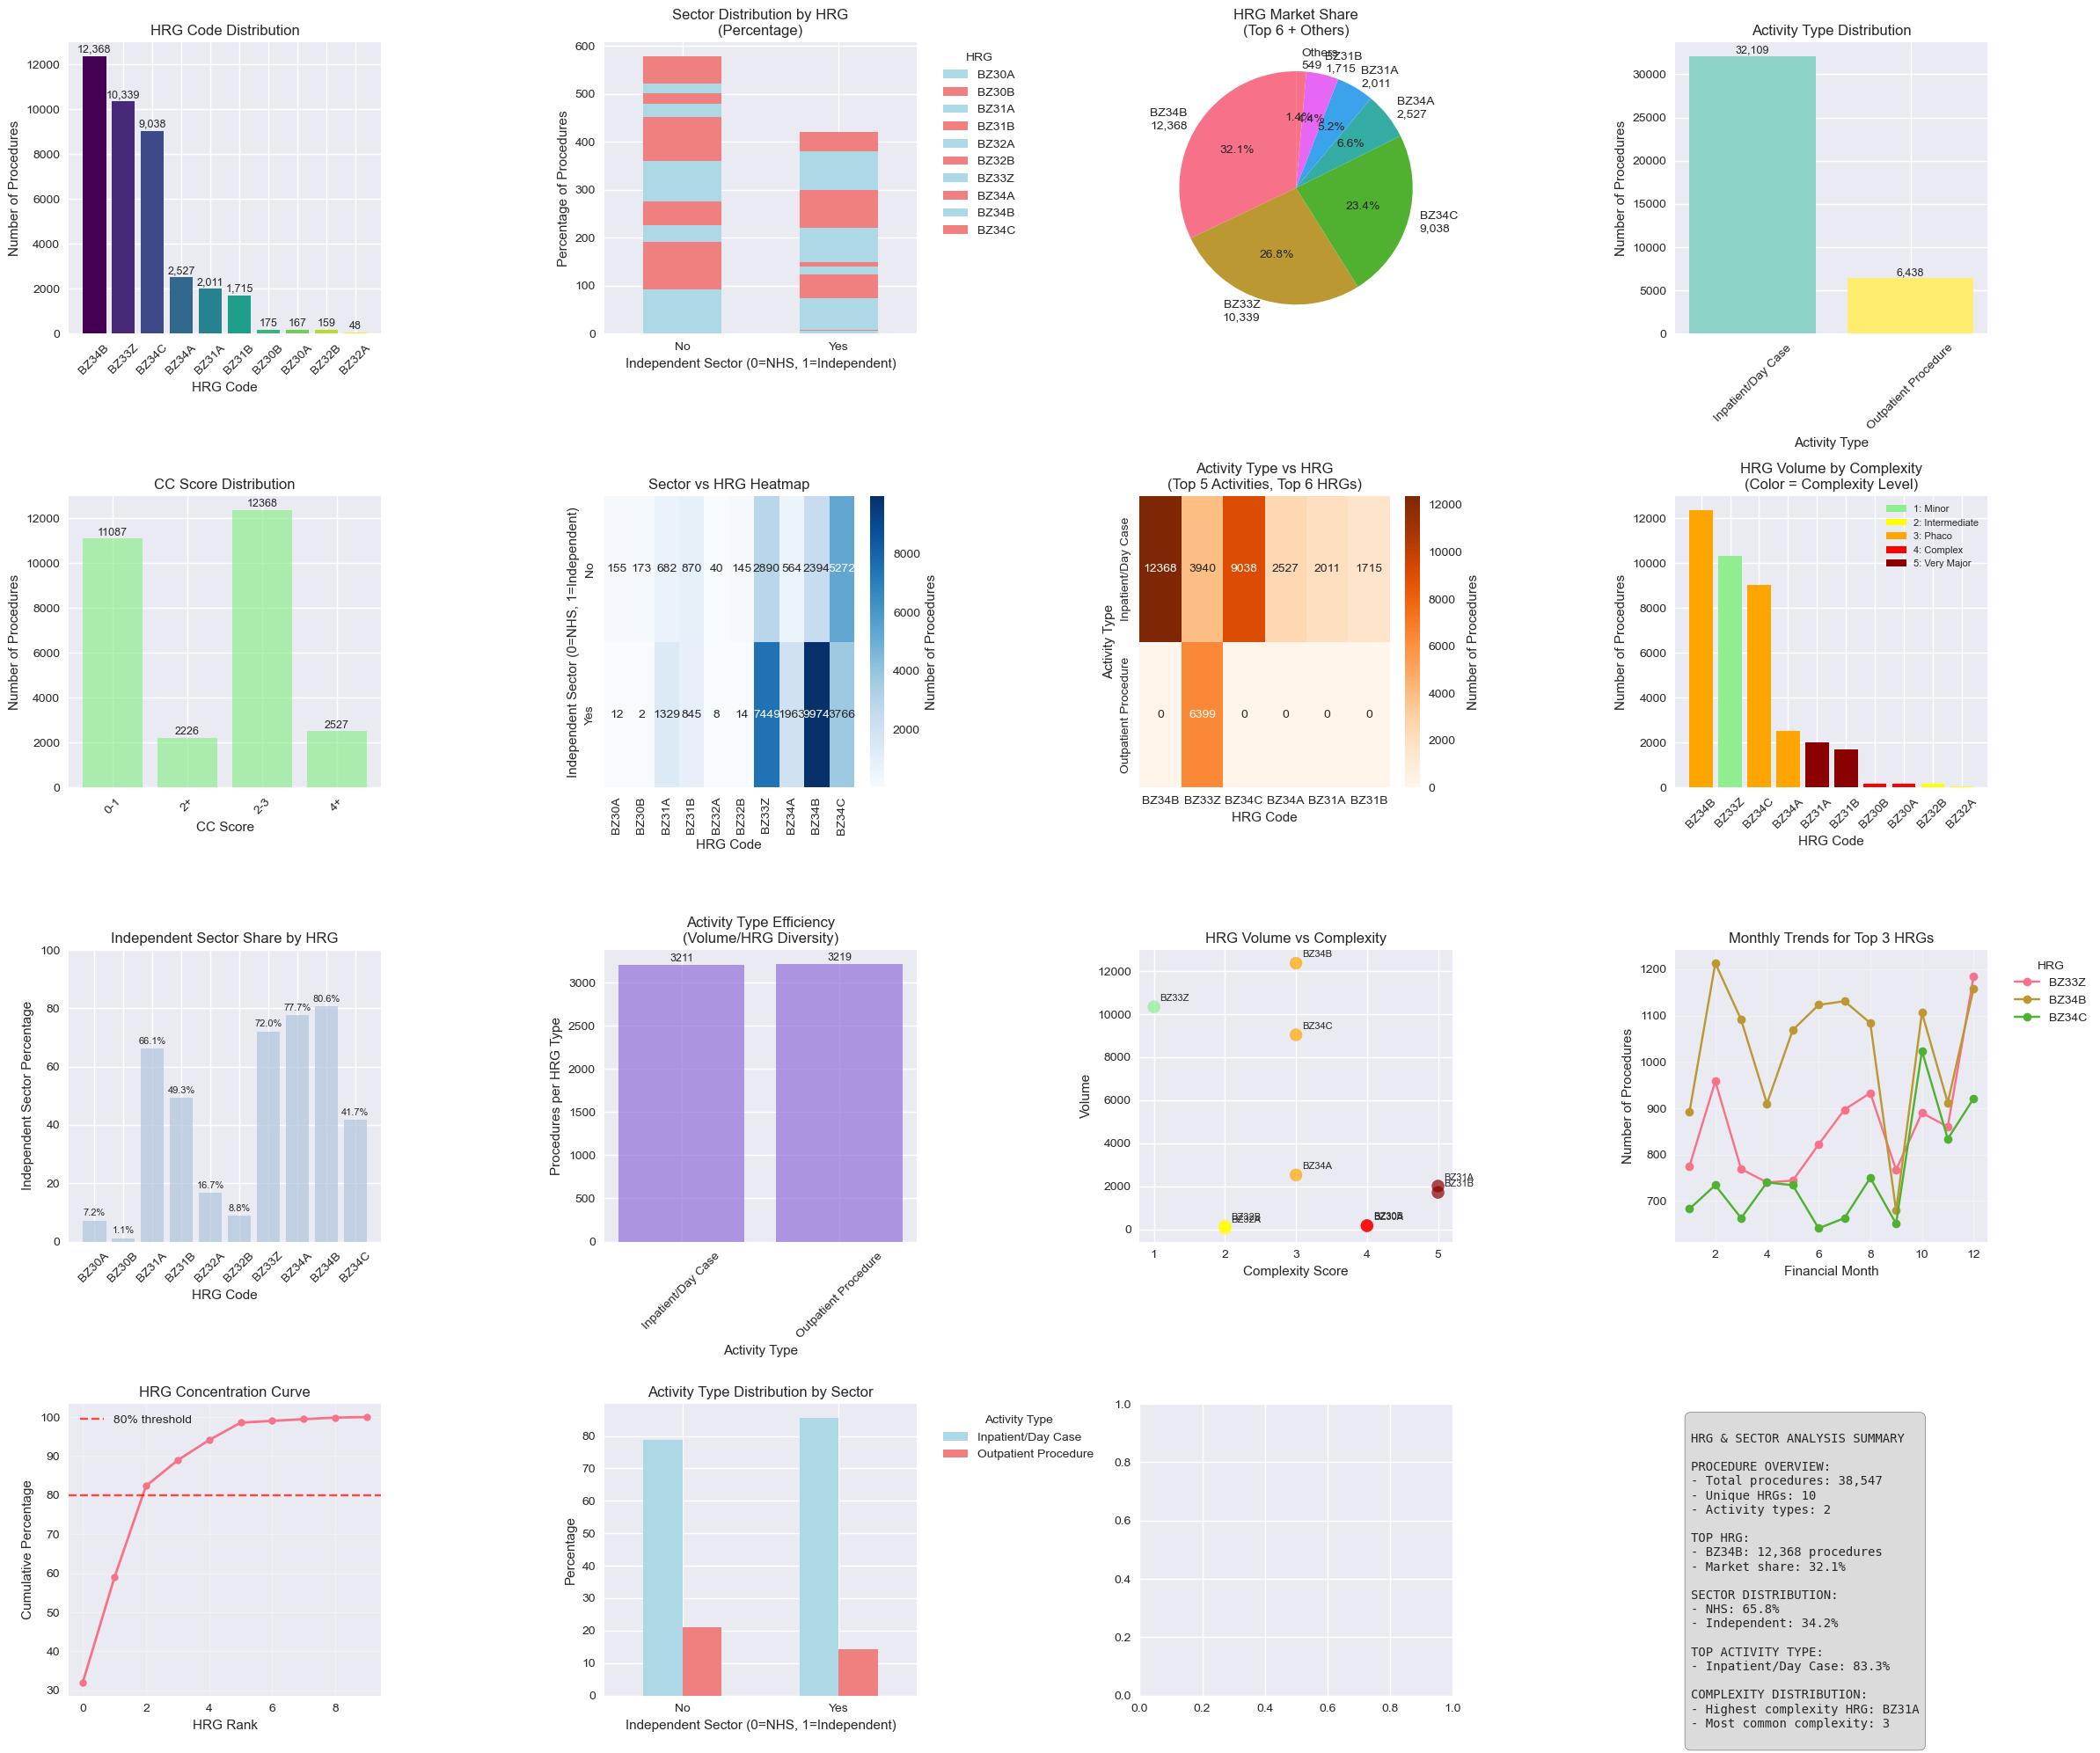

HRG, SECTOR, AND ACTIVITY TYPE ANALYSIS

HRG DISTRIBUTION:
 1. BZ34B: 12,368 procedures (32.1%) - Phaco
 2. BZ33Z: 10,339 procedures (26.8%) - Minor
 3. BZ34C: 9,038 procedures (23.4%) - Phaco
 4. BZ34A: 2,527 procedures (6.6%) - Phaco
 5. BZ31A: 2,011 procedures (5.2%) - Very Major
 6. BZ31B: 1,715 procedures (4.4%) - Very Major
 7. BZ30B: 175 procedures (0.5%) - Complex
 8. BZ30A: 167 procedures (0.4%) - Complex
 9. BZ32B: 159 procedures (0.4%) - Intermediate
10. BZ32A: 48 procedures (0.1%) - Intermediate

SECTOR COMPARISON BY HRG:

ACTIVITY TYPE ANALYSIS:
Inpatient/Day Case: 32,089.0 procedures (83.2%), 10.0 HRG types, Efficiency: 3208.9
Outpatient Procedure: 4,415.0 procedures (11.5%), 2.0 HRG types, Efficiency: 2207.5

CC SCORE DISTRIBUTION:
CC Score 0-1: 11087 procedures (39.3%)
CC Score 2+: 2226 procedures (7.9%)
CC Score 2-3: 12368 procedures (43.8%)
CC Score 4+: 2527 procedures (9.0%)


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Perform the analyses
complexity_dist = surgery['HRG'].value_counts()

# Independent sector vs NHS analysis
sector_comparison = surgery.groupby(['Independent Sector', 'HRG']).size().unstack(fill_value=0)

# Activity type analysis
activity_hrg = surgery.groupby(['Activity Type', 'HRG']).size().unstack(fill_value=0)

# CC Score analysis (from HRG descriptions)
surgery['CC_Score'] = surgery['HRG Description'].str.extract(r'CC Score (\d+[-+]?\d*)')
cc_analysis = surgery.groupby('CC_Score').size()

# Create comprehensive visualization
fig = plt.figure(figsize=(24, 20))

# 1. HRG Distribution
plt.subplot(4, 4, 1)
hrg_colors = plt.cm.viridis(np.linspace(0, 1, len(complexity_dist)))
bars = plt.bar(range(len(complexity_dist)), complexity_dist.values, color=hrg_colors)
plt.xlabel('HRG Code')
plt.ylabel('Number of Procedures')
plt.title('HRG Code Distribution')
plt.xticks(range(len(complexity_dist)), complexity_dist.index, rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# 2. Independent Sector vs NHS - Stacked Bar Chart
plt.subplot(4, 4, 2)
sector_comparison_pct = sector_comparison.div(sector_comparison.sum(axis=0), axis=1) * 100
sector_comparison_pct.plot(kind='bar', stacked=True, ax=plt.gca(), 
                          color=['lightblue', 'lightcoral'])
plt.xlabel('Independent Sector (0=NHS, 1=Independent)')
plt.ylabel('Percentage of Procedures')
plt.title('Sector Distribution by HRG\n(Percentage)')
plt.legend(title='HRG', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# 3. HRG Market Share Pie Chart
plt.subplot(4, 4, 3)
# Show top 6 HRGs and group others
top_6_hrgs = complexity_dist.head(6)
others_count = complexity_dist.iloc[6:].sum() if len(complexity_dist) > 6 else 0

plot_data = list(top_6_hrgs.values)
plot_labels = [f'{hrg}\n{count:,}' for hrg, count in top_6_hrgs.items()]

if others_count > 0:
    plot_data.append(others_count)
    plot_labels.append(f'Others\n{others_count:,}')

plt.pie(plot_data, labels=plot_labels, autopct='%1.1f%%', startangle=90)
plt.title('HRG Market Share\n(Top 6 + Others)')

# 4. Activity Type Distribution
plt.subplot(4, 4, 4)
activity_dist = surgery['Activity Type'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(activity_dist)))
bars = plt.bar(range(len(activity_dist)), activity_dist.values, color=colors)
plt.xlabel('Activity Type')
plt.ylabel('Number of Procedures')
plt.title('Activity Type Distribution')
plt.xticks(range(len(activity_dist)), activity_dist.index, rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# 5. CC Score Distribution
plt.subplot(4, 4, 5)
if not cc_analysis.empty:
    cc_analysis_clean = cc_analysis.dropna()
    bars = plt.bar(range(len(cc_analysis_clean)), cc_analysis_clean.values, 
                   color='lightgreen', alpha=0.7)
    plt.xlabel('CC Score')
    plt.ylabel('Number of Procedures')
    plt.title('CC Score Distribution')
    plt.xticks(range(len(cc_analysis_clean)), cc_analysis_clean.index, rotation=45)
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                 f'{int(height)}', ha='center', va='bottom', fontsize=9)
else:
    plt.text(0.5, 0.5, 'No CC Score data\navailable', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=12)
    plt.title('CC Score Distribution')

# 6. Sector Comparison Heatmap
plt.subplot(4, 4, 6)
if sector_comparison.shape[0] > 1:  # Only if we have both sectors
    sns.heatmap(sector_comparison, annot=True, fmt='d', cmap='Blues', 
                cbar_kws={'label': 'Number of Procedures'})
    plt.xlabel('HRG Code')
    plt.ylabel('Independent Sector (0=NHS, 1=Independent)')
    plt.title('Sector vs HRG Heatmap')
else:
    plt.text(0.5, 0.5, 'Only one sector\npresent in data', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=12)
    plt.title('Sector vs HRG Analysis')

# 7. Activity Type vs HRG Heatmap
plt.subplot(4, 4, 7)
# Select top activity types and HRGs for better visualization
top_activities = activity_hrg.sum(axis=1).nlargest(5).index
top_hrgs_for_activity = activity_hrg.sum(axis=0).nlargest(6).index

activity_hrg_subset = activity_hrg.loc[top_activities, top_hrgs_for_activity]
sns.heatmap(activity_hrg_subset, annot=True, fmt='d', cmap='Oranges',
            cbar_kws={'label': 'Number of Procedures'})
plt.xlabel('HRG Code')
plt.ylabel('Activity Type')
plt.title('Activity Type vs HRG\n(Top 5 Activities, Top 6 HRGs)')

# 8. HRG Complexity Analysis
plt.subplot(4, 4, 8)
# Map HRGs to complexity scores
complexity_mapping = {
    'BZ30A': 4, 'BZ30B': 4,  # Complex
    'BZ31A': 5, 'BZ31B': 5,  # Very Major
    'BZ32A': 2, 'BZ32B': 2,  # Intermediate
    'BZ33Z': 1,              # Minor
    'BZ34A': 3, 'BZ34B': 3, 'BZ34C': 3  # Phacoemulsification
}

hrg_complexity = pd.Series({hrg: complexity_mapping.get(hrg, 0) 
                           for hrg in complexity_dist.index})
complexity_colors = {1: 'lightgreen', 2: 'yellow', 3: 'orange', 4: 'red', 5: 'darkred', 0: 'gray'}
bar_colors = [complexity_colors[score] for score in hrg_complexity.values]

bars = plt.bar(range(len(complexity_dist)), complexity_dist.values, color=bar_colors)
plt.xlabel('HRG Code')
plt.ylabel('Number of Procedures')
plt.title('HRG Volume by Complexity\n(Color = Complexity Level)')
plt.xticks(range(len(complexity_dist)), complexity_dist.index, rotation=45)

# Add legend for complexity colors
complexity_labels = {1: 'Minor', 2: 'Intermediate', 3: 'Phaco', 4: 'Complex', 5: 'Very Major'}
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=complexity_colors[k], 
                                label=f'{k}: {v}') for k, v in complexity_labels.items()]
plt.legend(handles=legend_elements, loc='upper right', fontsize=8)

# 9. Sector Performance by HRG
plt.subplot(4, 4, 9)
if sector_comparison.shape[0] > 1:
    # Calculate sector percentages for each HRG
    sector_pct = sector_comparison.div(sector_comparison.sum(axis=0), axis=1) * 100
    
    # Plot independent sector percentage for each HRG
    independent_pct = sector_pct.iloc[1] if sector_pct.shape[0] > 1 else sector_pct.iloc[0]
    bars = plt.bar(range(len(independent_pct)), independent_pct.values, 
                   color='lightsteelblue', alpha=0.7)
    plt.xlabel('HRG Code')
    plt.ylabel('Independent Sector Percentage')
    plt.title('Independent Sector Share by HRG')
    plt.xticks(range(len(independent_pct)), independent_pct.index, rotation=45)
    plt.ylim(0, 100)
    
    # Add percentage labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=8)
else:
    plt.text(0.5, 0.5, 'Single sector\nanalysis', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=12)
    plt.title('Sector Analysis')

# 10. Activity Type Efficiency
plt.subplot(4, 4, 10)
activity_volume = surgery.groupby('Activity Type').size()
activity_diversity = surgery.groupby('Activity Type')['HRG'].nunique()
activity_efficiency = activity_volume / activity_diversity

bars = plt.bar(range(len(activity_efficiency)), activity_efficiency.values, 
               color='mediumpurple', alpha=0.7)
plt.xlabel('Activity Type')
plt.ylabel('Procedures per HRG Type')
plt.title('Activity Type Efficiency\n(Volume/HRG Diversity)')
plt.xticks(range(len(activity_efficiency)), activity_efficiency.index, rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.0f}', ha='center', va='bottom', fontsize=9)

# 11. HRG vs Complexity Scatter
plt.subplot(4, 4, 11)
hrg_data = []
for hrg in complexity_dist.index:
    volume = complexity_dist[hrg]
    complexity = complexity_mapping.get(hrg, 0)
    hrg_data.append((hrg, volume, complexity))

hrg_df = pd.DataFrame(hrg_data, columns=['HRG', 'Volume', 'Complexity'])
scatter_colors = [complexity_colors[c] for c in hrg_df['Complexity']]

plt.scatter(hrg_df['Complexity'], hrg_df['Volume'], 
           c=scatter_colors, s=100, alpha=0.7)
plt.xlabel('Complexity Score')
plt.ylabel('Volume')
plt.title('HRG Volume vs Complexity')

# Add HRG labels
for i, row in hrg_df.iterrows():
    plt.annotate(row['HRG'], (row['Complexity'], row['Volume']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# 12. Monthly Trend by Top HRGs
plt.subplot(4, 4, 12)
top_3_hrgs = complexity_dist.head(3).index
monthly_hrg = surgery[surgery['HRG'].isin(top_3_hrgs)].groupby(['Fin Month', 'HRG']).size().unstack(fill_value=0)

if not monthly_hrg.empty:
    monthly_hrg.plot(kind='line', marker='o', ax=plt.gca())
    plt.xlabel('Financial Month')
    plt.ylabel('Number of Procedures')
    plt.title('Monthly Trends for Top 3 HRGs')
    plt.legend(title='HRG', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)

# 13. HRG Concentration Analysis
plt.subplot(4, 4, 13)
# Calculate cumulative percentage
cumulative_pct = (complexity_dist.cumsum() / complexity_dist.sum() * 100)
plt.plot(range(len(cumulative_pct)), cumulative_pct.values, 
         marker='o', linewidth=2, markersize=6)
plt.xlabel('HRG Rank')
plt.ylabel('Cumulative Percentage')
plt.title('HRG Concentration Curve')
plt.grid(True, alpha=0.3)

# Add 80% line
plt.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% threshold')
plt.legend()

# 14. Sector vs Activity Type Cross-Analysis
plt.subplot(4, 4, 14)
if 'Independent Sector' in surgery.columns:
    sector_activity = surgery.groupby(['Independent Sector', 'Activity Type']).size().unstack(fill_value=0)
    if sector_activity.shape[0] > 1:
        sector_activity_pct = sector_activity.div(sector_activity.sum(axis=1), axis=0) * 100
        sector_activity_pct.plot(kind='bar', ax=plt.gca(), 
                                color=['lightblue', 'lightcoral', 'lightgreen'])
        plt.xlabel('Independent Sector (0=NHS, 1=Independent)')
        plt.ylabel('Percentage')
        plt.title('Activity Type Distribution by Sector')
        plt.legend(title='Activity Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=0)

# 15. CC Score vs Volume Analysis
plt.subplot(4, 4, 15)
if not cc_analysis.empty:
    cc_clean = cc_analysis.dropna()
    if len(cc_clean) > 0:
        # Convert CC scores to numeric for plotting
        cc_numeric = pd.to_numeric(cc_clean.index, errors='coerce')
        cc_volume = cc_clean.values
        
        valid_indices = ~pd.isna(cc_numeric)
        if valid_indices.any():
            plt.scatter(cc_numeric[valid_indices], cc_volume[valid_indices], 
                       s=100, alpha=0.7, color='darkgreen')
            plt.xlabel('CC Score')
            plt.ylabel('Volume')
            plt.title('CC Score vs Volume')
            plt.grid(True, alpha=0.3)

# 16. Summary Statistics Dashboard
plt.subplot(4, 4, 16)
plt.axis('off')

# Calculate key statistics
total_procedures = len(surgery)
total_hrgs = len(complexity_dist)
top_hrg = complexity_dist.index[0]
top_hrg_volume = complexity_dist.iloc[0]
top_hrg_pct = (top_hrg_volume / total_procedures) * 100

# Calculate sector split if available
if 'Independent Sector' in surgery.columns:
    sector_split = surgery['Independent Sector'].value_counts()
    nhs_pct = (sector_split.get(0, 0) / total_procedures) * 100
    independent_pct = (sector_split.get(1, 0) / total_procedures) * 100
else:
    nhs_pct = 100
    independent_pct = 0

# Calculate activity type diversity
activity_types = len(surgery['Activity Type'].unique())
top_activity = surgery['Activity Type'].value_counts().index[0]
top_activity_pct = (surgery['Activity Type'].value_counts().iloc[0] / total_procedures) * 100

summary_text = f"""
HRG & SECTOR ANALYSIS SUMMARY

PROCEDURE OVERVIEW:
- Total procedures: {total_procedures:,}
- Unique HRGs: {total_hrgs}
- Activity types: {activity_types}

TOP HRG:
- {top_hrg}: {top_hrg_volume:,} procedures
- Market share: {top_hrg_pct:.1f}%

SECTOR DISTRIBUTION:
- NHS: {nhs_pct:.1f}%
- Independent: {independent_pct:.1f}%

TOP ACTIVITY TYPE:
- {top_activity}: {top_activity_pct:.1f}%

COMPLEXITY DISTRIBUTION:
- Highest complexity HRG: {hrg_df.loc[hrg_df['Complexity'].idxmax(), 'HRG'] if not hrg_df.empty else 'N/A'}
- Most common complexity: {hrg_df['Complexity'].mode().iloc[0] if not hrg_df.empty else 'N/A'}
"""

plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("HRG, SECTOR, AND ACTIVITY TYPE ANALYSIS")
print("="*80)

print(f"\nHRG DISTRIBUTION:")
for i, (hrg, count) in enumerate(complexity_dist.head(10).items(), 1):
    pct = (count / total_procedures) * 100
    complexity = complexity_mapping.get(hrg, 0)
    complexity_name = {1: 'Minor', 2: 'Intermediate', 3: 'Phaco', 4: 'Complex', 5: 'Very Major'}.get(complexity, 'Unknown')
    print(f"{i:2}. {hrg}: {count:,} procedures ({pct:.1f}%) - {complexity_name}")

if sector_comparison.shape[0] > 1:
    print(f"\nSECTOR COMPARISON BY HRG:")
    for hrg in sector_comparison.columns:
        nhs_vol = sector_comparison.loc[0, hrg] if 0 in sector_comparison.index else 0
        ind_vol = sector_comparison.loc[1, hrg] if 1 in sector_comparison.index else 0
        total_vol = nhs_vol + ind_vol
        if total_vol > 0:
            nhs_pct = (nhs_vol / total_vol) * 100
            ind_pct = (ind_vol / total_vol) * 100
            print(f"{hrg}: NHS {nhs_pct:.1f}% ({nhs_vol:,}), Independent {ind_pct:.1f}% ({ind_vol:,})")

print(f"\nACTIVITY TYPE ANALYSIS:")
activity_summary = surgery.groupby('Activity Type').agg({
    'Local Patient Identifier': 'count',
    'HRG': 'nunique'
}).round(2)
activity_summary.columns = ['Volume', 'HRG_Diversity']
activity_summary['Efficiency'] = activity_summary['Volume'] / activity_summary['HRG_Diversity']

for activity, row in activity_summary.iterrows():
    pct = (row['Volume'] / total_procedures) * 100
    print(f"{activity}: {row['Volume']:,} procedures ({pct:.1f}%), "
          f"{row['HRG_Diversity']} HRG types, "
          f"Efficiency: {row['Efficiency']:.1f}")

if not cc_analysis.empty:
    print(f"\nCC SCORE DISTRIBUTION:")
    cc_clean = cc_analysis.dropna()
    for cc_score, count in cc_clean.items():
        pct = (count / cc_clean.sum()) * 100
        print(f"CC Score {cc_score}: {count} procedures ({pct:.1f}%)")

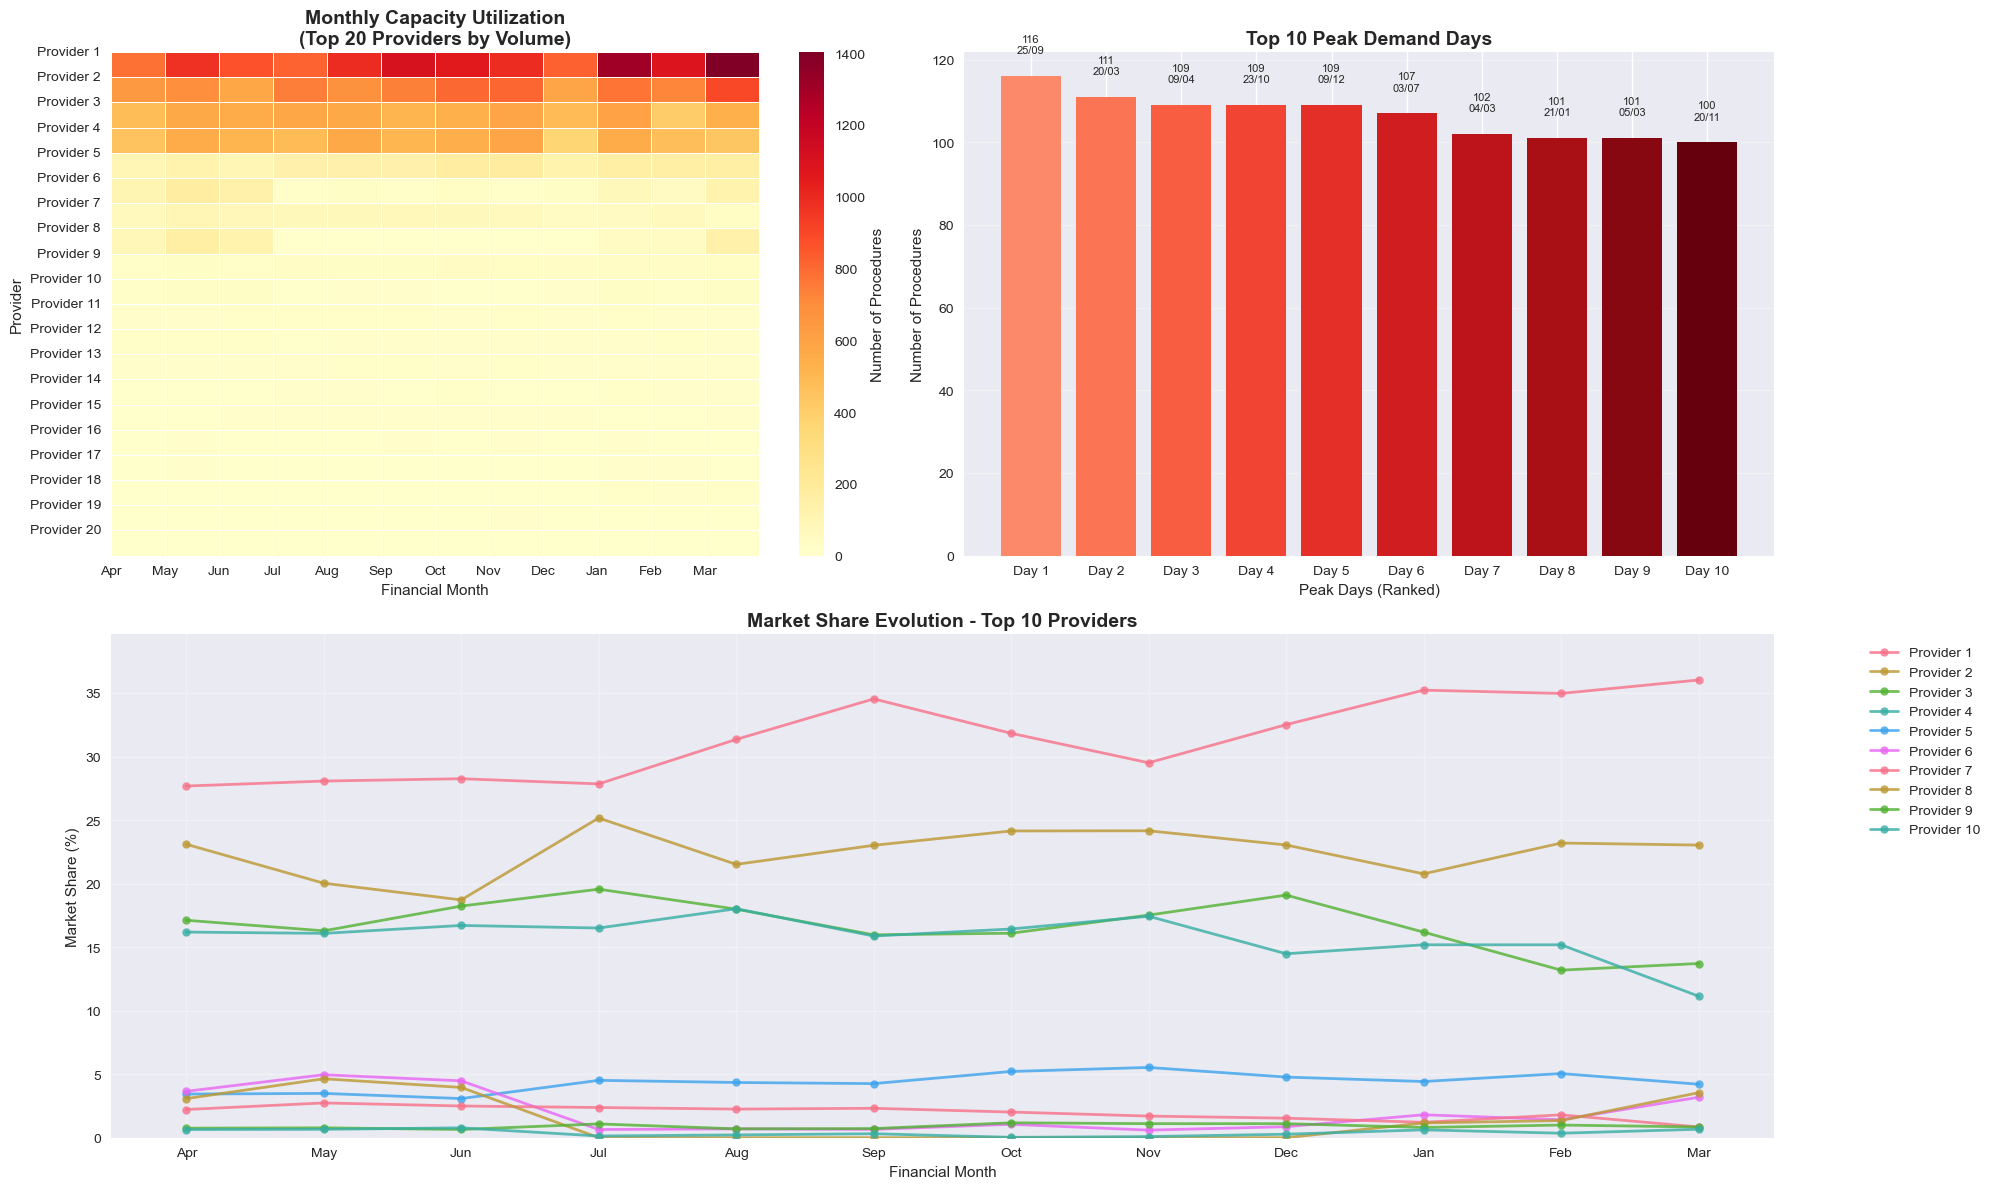

CAPACITY UTILIZATION & MARKET DYNAMICS ANALYSIS

MONTHLY CAPACITY INSIGHTS:
Highest activity month: Mar (3,895 procedures)
Lowest activity month: Dec (2,535 procedures)
Monthly variation: 42.3%

PEAK DEMAND ANALYSIS:
Highest single day: 116 procedures on 2024-09-25 00:00:00
Average daily volume: 41 procedures
Peak day vs average: 184.7% above average

MARKET CONCENTRATION:
Top 5 providers control: 90.8% of market
Top 10 providers control: 97.6% of market
HHI (concentration index): 2056

MARKET SHARE LEADERS:
1. Provider ANGLIA COMMUNITY EYE SERVICE LTD: 31.48% average share ↗
2. Provider SPAMEDICA PETERBOROUGH: 22.49% average share ↘
3. Provider CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION TRUST: 16.74% average share ↘
4. Provider NORTH WEST ANGLIA NHS FOUNDATION TRUST: 15.77% average share ↘
5. Provider SPAMEDICA BEDFORD: 4.36% average share ↗


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Perform the analyses
monthly_capacity = surgery.groupby(['Provider', 'Fin Month']).size().unstack(fill_value=0)
daily_activity = surgery.groupby('Activity Date').size()
peak_days = daily_activity.nlargest(10)
market_share_evolution = surgery.groupby(['Fin Month', 'Provider']).size().unstack(fill_value=0)
market_share_pct = market_share_evolution.div(market_share_evolution.sum(axis=1), axis=0) * 100

# Financial month names for better labeling
fin_month_names = {
    1: 'Apr', 2: 'May', 3: 'Jun', 4: 'Jul', 5: 'Aug', 6: 'Sep',
    7: 'Oct', 8: 'Nov', 9: 'Dec', 10: 'Jan', 11: 'Feb', 12: 'Mar'
}

# Create the visualizations
fig = plt.figure(figsize=(20, 12))

# 1. Monthly Capacity Utilization Heatmap (Top 20 Providers)
plt.subplot(2, 2, 1)
# Select top 20 providers by total volume for better visualization
top_providers = monthly_capacity.sum(axis=1).nlargest(20).index
capacity_subset = monthly_capacity.loc[top_providers]

# Create heatmap
sns.heatmap(capacity_subset, annot=False, cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Procedures'},
            linewidths=0.5)
plt.title('Monthly Capacity Utilization\n(Top 20 Providers by Volume)', fontsize=14, fontweight='bold')
plt.xlabel('Financial Month')
plt.ylabel('Provider')

# Update x-axis labels to show month names
month_labels = [fin_month_names.get(int(col), str(col)) for col in capacity_subset.columns]
plt.xticks(range(len(capacity_subset.columns)), month_labels)

# Update y-axis to show provider ranks instead of full names
plt.yticks(range(len(top_providers)), [f'Provider {i+1}' for i in range(len(top_providers))])

# 2. Peak Demand Analysis
plt.subplot(2, 2, 2)
# Convert Activity Date to datetime if it's not already
peak_days_df = peak_days.reset_index()
peak_days_df['Activity Date'] = pd.to_datetime(peak_days_df['Activity Date'])

# Create bar chart for peak days
bars = plt.bar(range(len(peak_days)), peak_days.values, 
               color=plt.cm.Reds(np.linspace(0.4, 1, len(peak_days))))
plt.xlabel('Peak Days (Ranked)')
plt.ylabel('Number of Procedures')
plt.title('Top 10 Peak Demand Days', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    date_str = peak_days_df.iloc[i]['Activity Date'].strftime('%d/%m')
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}\n{date_str}', ha='center', va='bottom', fontsize=8)

plt.xticks(range(len(peak_days)), [f'Day {i+1}' for i in range(len(peak_days))])
plt.grid(True, alpha=0.3, axis='y')

# 3. Provider Market Share Evolution (Top 10 Providers)
plt.subplot(2, 1, 2)
# Select top 10 providers by average market share
top_market_providers = market_share_pct.mean().nlargest(10).index
market_evolution_subset = market_share_pct[top_market_providers]

# Create line plot with markers
for i, provider in enumerate(top_market_providers):
    plt.plot(market_evolution_subset.index, market_evolution_subset[provider], 
             marker='o', linewidth=2, markersize=6, 
             label=f'Provider {i+1}', alpha=0.8)

plt.xlabel('Financial Month')
plt.ylabel('Market Share (%)')
plt.title('Market Share Evolution - Top 10 Providers', fontsize=14, fontweight='bold')

# Update x-axis labels
x_labels = [fin_month_names.get(month, str(month)) for month in market_evolution_subset.index]
plt.xticks(market_evolution_subset.index, x_labels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.grid(True, alpha=0.3)
plt.ylim(0, max(market_evolution_subset.max()) * 1.1)

plt.tight_layout()
plt.show()

# Additional summary statistics
print("="*80)
print("CAPACITY UTILIZATION & MARKET DYNAMICS ANALYSIS")
print("="*80)

print(f"\nMONTHLY CAPACITY INSIGHTS:")
monthly_totals = monthly_capacity.sum(axis=0)
print(f"Highest activity month: {fin_month_names[monthly_totals.idxmax()]} ({monthly_totals.max():,} procedures)")
print(f"Lowest activity month: {fin_month_names[monthly_totals.idxmin()]} ({monthly_totals.min():,} procedures)")
print(f"Monthly variation: {((monthly_totals.max() - monthly_totals.min()) / monthly_totals.mean() * 100):.1f}%")

print(f"\nPEAK DEMAND ANALYSIS:")
print(f"Highest single day: {peak_days.iloc[0]:,} procedures on {peak_days.index[0]}")
print(f"Average daily volume: {daily_activity.mean():.0f} procedures")
print(f"Peak day vs average: {(peak_days.iloc[0] / daily_activity.mean() - 1) * 100:.1f}% above average")

print(f"\nMARKET CONCENTRATION:")
# Calculate market concentration metrics
avg_market_shares = market_share_pct.mean().sort_values(ascending=False)
top_5_share = avg_market_shares.head(5).sum()
top_10_share = avg_market_shares.head(10).sum()
hhi = (avg_market_shares**2).sum()

print(f"Top 5 providers control: {top_5_share:.1f}% of market")
print(f"Top 10 providers control: {top_10_share:.1f}% of market")
print(f"HHI (concentration index): {hhi:.0f}")

print(f"\nMARKET SHARE LEADERS:")
for i, (provider, share) in enumerate(avg_market_shares.head(5).items(), 1):
    # Calculate if share is growing or declining
    start_share = market_share_pct.iloc[0][provider] if provider in market_share_pct.columns else 0
    end_share = market_share_pct.iloc[-1][provider] if provider in market_share_pct.columns else 0
    trend = "↗" if end_share > start_share else "↘" if end_share < start_share else "→"
    print(f"{i}. Provider {provider}: {share:.2f}% average share {trend}")

In [37]:
# Missing data patterns
missing_analysis = surgery.isnull().sum()
missing_by_provider = surgery.groupby('Provider').apply(lambda x: x.isnull().sum())

# Data consistency checks
# Check for duplicate patient procedures on same date
duplicates = surgery.groupby(['Local Patient Identifier', 'Activity Date']).size()
potential_duplicates = duplicates[duplicates > 1]

# Outlier detection
# Unusual activity patterns
provider_monthly_stats = surgery.groupby(['Provider', 'Fin Month']).size()
provider_outliers = provider_monthly_stats.groupby('Provider').apply(
    lambda x: x[abs(x - x.mean()) > 2 * x.std()]
)

C:\Users\CSC\AppData\Local\Temp\ipykernel_20296\37400062.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_provider = surgery.groupby('Provider').apply(lambda x: x.isnull().sum())


In [38]:
# Correlation analysis
numerical_features = surgery.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()

# Provider efficiency scoring
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create provider efficiency features
provider_features = surgery.groupby('Provider').agg({
    'Local Patient Identifier': 'count',
    'HRG': 'nunique',
    'LSOA': 'nunique',
    'Complexity_Score': 'mean'
})

# Standardize and perform PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(provider_features)
pca = PCA(n_components=2)
provider_pca = pca.fit_transform(features_scaled)

In [39]:
# Simulated waiting time analysis (if you have referral dates)
# For now, we can analyze activity patterns that might indicate capacity constraints

# Monthly demand variability
demand_variability = surgery.groupby('Fin Month').size()
demand_cv = demand_variability.std() / demand_variability.mean()

# Provider capacity utilization patterns
provider_utilization = surgery.groupby(['Provider', 'Fin Month']).size()
utilization_stats = provider_utilization.groupby('Provider').agg(['mean', 'std', 'min', 'max'])

# Identify potential bottlenecks
bottleneck_analysis = surgery.groupby(['Provider', 'HRG']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Distribution of Procedures Across LSOAs')

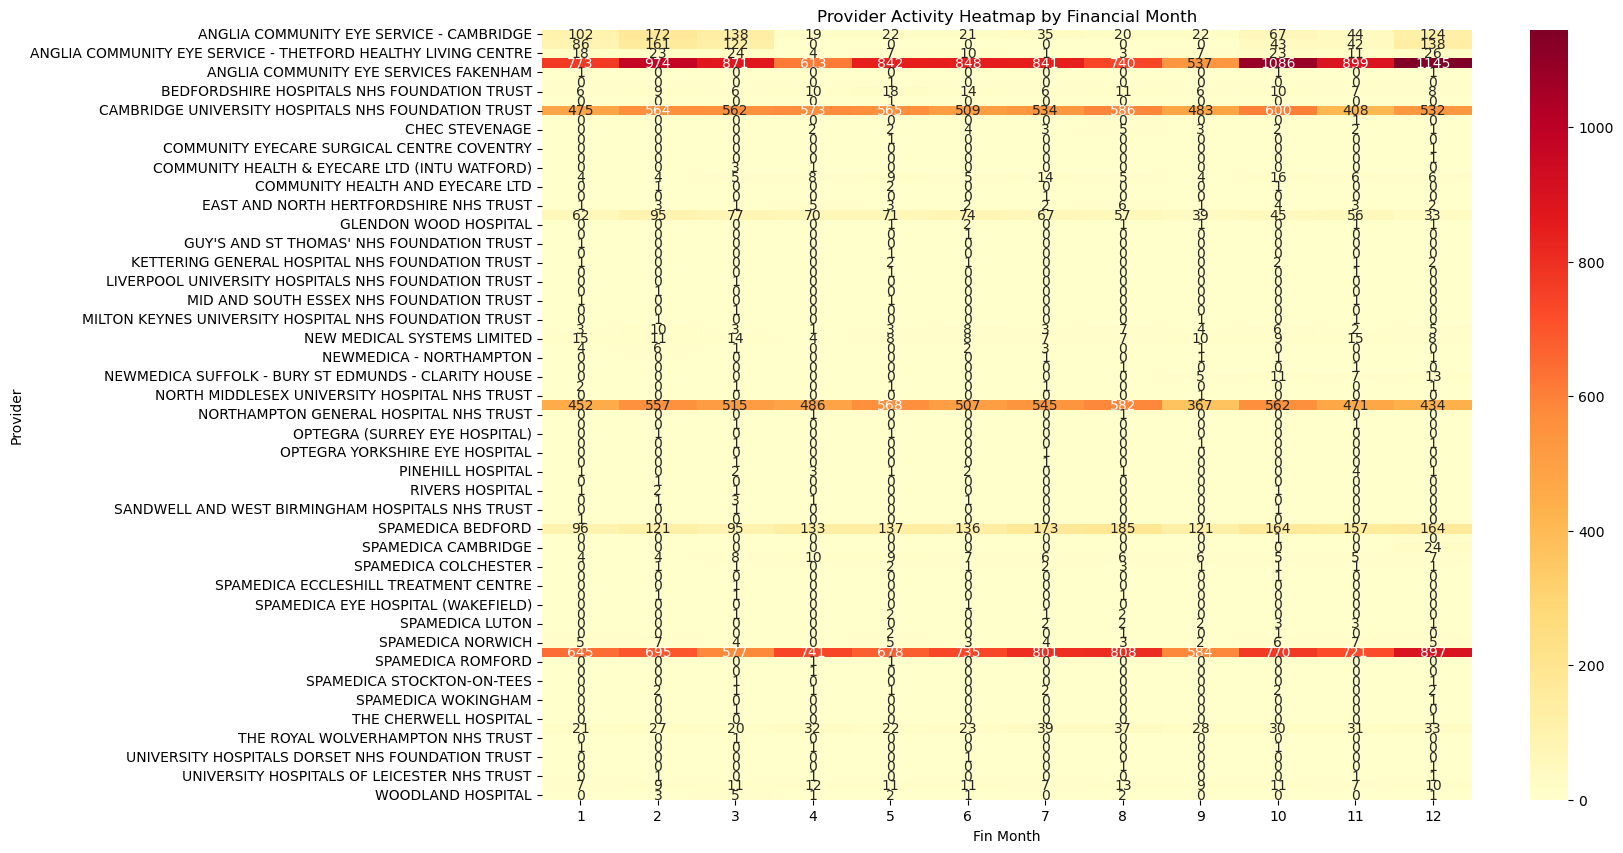

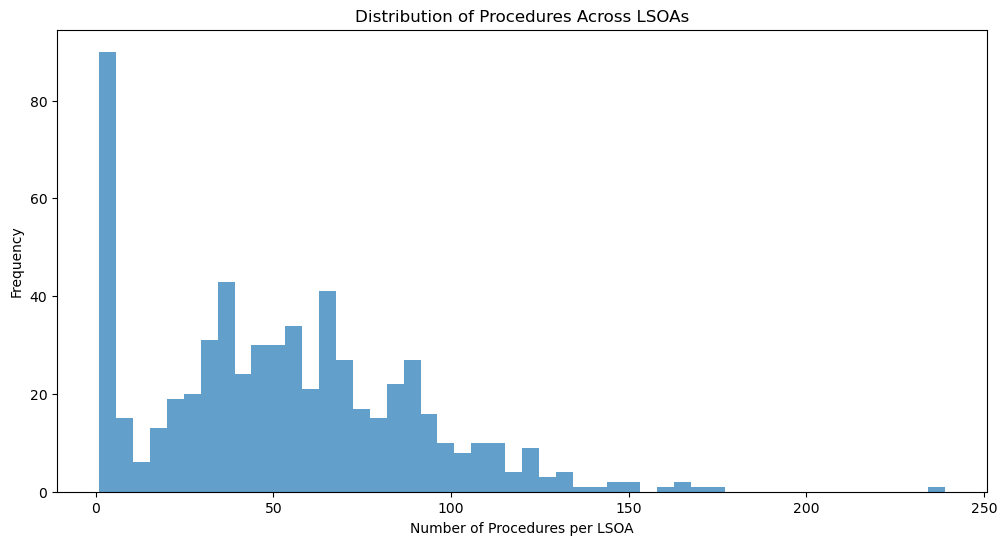

In [41]:
# Advanced visualizations
import seaborn as sns

# Heatmap of provider activity by month
plt.figure(figsize=(15, 10))
provider_month_pivot = surgery.pivot_table(
    values='Local Patient Identifier', 
    index='Provider', 
    columns='Fin Month', 
    aggfunc='count', 
    fill_value=0
).sort_values(by='Provider')
sns.heatmap(provider_month_pivot, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Provider Activity Heatmap by Financial Month')

# Geographic distribution
lsoa_counts = surgery['LSOA'].value_counts()
plt.figure(figsize=(12, 6))
plt.hist(lsoa_counts, bins=50, alpha=0.7)
plt.xlabel('Number of Procedures per LSOA')
plt.ylabel('Frequency')
plt.title('Distribution of Procedures Across LSOAs')

In [42]:
# Key Performance Indicators
total_procedures = len(surgery)
unique_patients = surgery['Local Patient Identifier'].nunique()
procedures_per_patient = total_procedures / unique_patients if unique_patients > 0 else 0

# Market concentration
from scipy.stats import entropy
provider_shares = surgery['Provider'].value_counts(normalize=True)
market_concentration = 1 - entropy(provider_shares)

# Procedure complexity index
overall_complexity = surgery['Complexity_Score'].mean()

print(f"Total Procedures: {total_procedures:,}")
print(f"Unique Patients: {unique_patients:,}")
print(f"Average Procedures per Patient: {procedures_per_patient:.2f}")
print(f"Market Concentration Index: {market_concentration:.3f}")
print(f"Average Complexity Score: {overall_complexity:.2f}")

Total Procedures: 38,547
Unique Patients: 24,322
Average Procedures per Patient: 1.58
Market Concentration Index: -0.875
Average Complexity Score: 2.66


In [1]:
print('hello')

hello
